# Initial Project Set Up

## Setting up Git Repository

To allow for version control and future sharing on Git Hub I created a git repository using the following code in the project folder using:  

`git init`  
`git add .`

## Creating a Virtual Environment

I created a Virtual environment created for project named `venv`.  

Comment Line Code to create virtual environment:  

`python -m venv venv`  


Command Line Code to activate venv:  

`venv\Scripts\activate`

## Creating a Kernel using the Virtual Environment

To use this virtual environment in Jupyter notebooks a Kernel was created that uses the virtual environment. To activate the environment go to Kernel > Change Kernel > 'finalproject'  

Command Line Code to create new Kernel using the virtual environment:  

`pip install --user ipykernel`  
`python -m ipykernel install --user --name=finalproject`

## Import Required Packages

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Raw Data

In [114]:
mds = pd.read_csv("NH_QualityMsr_MDS_Aug2023.csv",
                 low_memory = False)

survey = pd.read_csv("NH_SurveySummary_Aug2023.csv")
claims = pd.read_csv("NH_QualityMsr_Claims_Aug2023.csv")
provider = pd.read_csv("NH_ProviderInfo_Aug2023.csv")

## Exploratory Data Analysis

### a) Minimum Data Set (MDS) Quality Measures - August 2023

In [3]:
# Preview Data
mds

CMS Certification Number (CCN)                  Provider Name  \
0                              015009       BURNS NURSING HOME, INC.   
1                              015009       BURNS NURSING HOME, INC.   
2                              015009       BURNS NURSING HOME, INC.   
3                              015009       BURNS NURSING HOME, INC.   
4                              015009       BURNS NURSING HOME, INC.   
...                               ...                            ...   
269869                         745021  LINDALE SPECIALTY CARE CENTER   
269870                         745021  LINDALE SPECIALTY CARE CENTER   
269871                         745021  LINDALE SPECIALTY CARE CENTER   
269872                         745021  LINDALE SPECIALTY CARE CENTER   
269873                         745021  LINDALE SPECIALTY CARE CENTER   

            Provider Address     City/Town State  ZIP Code  Measure Code  \
0       701 MONROE STREET NW  RUSSELLVILLE    AL     35653           401   
1       701 MONROE STREET NW  RUSSELLVILLE    AL     35653           404   
2       701 MONROE STREET NW  RUSSELLVILLE    AL     35653           405   
3       701 MONROE STREET NW  RUSSELLVILLE    AL     35653           406   
4       701 MONROE STREET NW  RUSSELLVILLE    AL     35653           407   
...                      ...           ...   ...       ...           ...   
269869         13905 FM 2710       LINDALE    TX     75771           452   
269870         13905 FM 2710       LINDALE    TX     75771           453   
269871         13905 FM 2710       LINDALE    TX     75771           454   
269872         13905 FM 2710       LINDALE    TX     75771           471   
269873         13905 FM 2710       LINDALE    TX     75771           472   

                                      Measure Description Resident type  \
0       Percentage of long-stay residents whose need f...     Long Stay   
1       Percentage of long-stay residents who lose too...     Long Stay   
2       Percentage of low risk long-stay residents who...     Long Stay   
3       Percentage of long-stay residents with a cathe...     Long Stay   
4       Percentage of long-stay residents with a urina...     Long Stay   
...                                                   ...           ...   
269869  Percentage of long-stay residents who received...     Long Stay   
269870  Percentage of high risk long-stay residents wi...     Long Stay   
269871  Percentage of long-stay residents assessed and...     Long Stay   
269872  Percentage of short-stay residents who made im...    Short Stay   
269873  Percentage of short-stay residents who were as...    Short Stay   

        Q1 Measure Score  ...  Q3 Measure Score  \
0                5.12821  ...          4.347830   
1                2.43902  ...          2.173910   
2                    NaN  ...               NaN   
3                0.00000  ...          3.694882   
4                0.00000  ...          0.000000   
...                  ...  ...               ...   
269869               NaN  ...               NaN   
269870               NaN  ...               NaN   
269871               NaN  ...               NaN   
269872               NaN  ...               NaN   
269873               NaN  ...               NaN   

        Footnote for Q3 Measure Score  Q4 Measure Score  \
0                                 NaN          6.666667   
1                                 NaN          2.325581   
2                                 9.0               NaN   
3                                 NaN          3.256078   
4                                 NaN          4.347826   
...                               ...               ...   
269869                            9.0               NaN   
269870                            9.0               NaN   
269871                           10.0               NaN   
269872                            9.0               NaN   
269873                           10.0         24.761905   

      

In [4]:
mds.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Measure Code', 'Measure Description',
       'Resident type', 'Q1 Measure Score', 'Footnote for Q1 Measure Score',
       'Q2 Measure Score', 'Footnote for Q2 Measure Score', 'Q3 Measure Score',
       'Footnote for Q3 Measure Score', 'Q4 Measure Score',
       'Footnote for Q4 Measure Score', 'Four Quarter Average Score',
       'Footnote for Four Quarter Average Score',
       'Used in Quality Measure Five Star Rating', 'Measure Period',
       'Location', 'Processing Date'],
      dtype='object')

From the above we can see that the table is 269874 rows × 23 columns with each row representing a combination of provider name, quality measure, and resident type. From the data dictionary, we learn that CMS Certification Number (CCN) is a unique number for each facility.

In [5]:
# Create reusable function that shows value counts including NA and proportions

def count_proportion(column):
    '''
    Returns dataframe with value counts and proportion including na.
    Takes column as the input.
    '''
    a = column.value_counts(dropna = False)
    b = column.value_counts(normalize = True, dropna = False)
    return pd.concat([a, b], axis = 1)

In [6]:
# Review the different resident types

count_proportion(mds['Resident type'])

count  proportion
Resident type                    
Long Stay      209902    0.777778
Short Stay      59972    0.222222

For the scope of this project we are only interested in long stay residents. We will filter the data for Long Stay Residents

In [7]:
mds_longstay = mds[mds['Resident type'] == 'Long Stay']

The footnote fields for each quarter correspond to a code in the data dictionary as below:

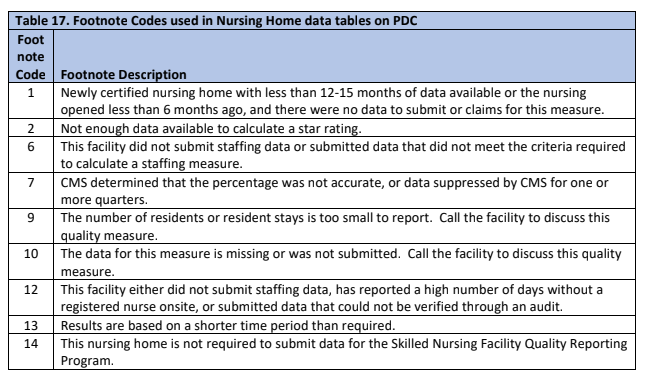
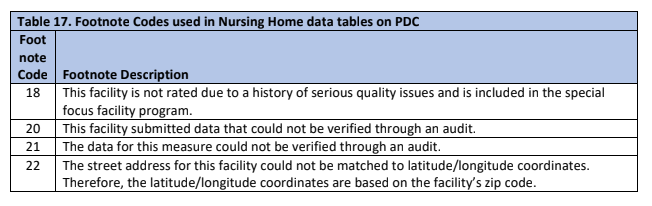
Source: Data Dictionary (page 25 - 26)

In [8]:
count_proportion(mds_longstay['Footnote for Q1 Measure Score'])

count  proportion
Footnote for Q1 Measure Score                    
NaN                            183923    0.876233
9.0                             24877    0.118517
10.0                              934    0.004450
21.0                              168    0.000800

In [9]:
count_proportion(mds_longstay['Footnote for Q2 Measure Score'])

count  proportion
Footnote for Q2 Measure Score                    
NaN                            184635    0.879625
9.0                             24165    0.115125
10.0                              934    0.004450
21.0                              168    0.000800

In [10]:
count_proportion(mds_longstay['Footnote for Q3 Measure Score'])

count  proportion
Footnote for Q3 Measure Score                    
NaN                            184983    0.881283
9.0                             23991    0.114296
10.0                              760    0.003621
21.0                              168    0.000800

In [11]:
count_proportion(mds_longstay['Footnote for Q4 Measure Score'])

count  proportion
Footnote for Q4 Measure Score                    
NaN                            185305    0.882817
9.0                             23757    0.113181
10.0                              672    0.003201
21.0                              168    0.000800

In [12]:
count_proportion(mds_longstay['Footnote for Four Quarter Average Score'])

count  proportion
Footnote for Four Quarter Average Score                    
NaN                                      202991    0.967075
9.0                                        6385    0.030419
10.0                                        358    0.001706
21.0                                        168    0.000800

Across all four quarters, about 88% of rows did not have a foot note.  

For the average score column, 96.7% of rows did not have a footnote.  

The most common reasons for a footnote weere:  

9 - The number of residents too small to report  
10 - Missing or not submitted  
21 - Data could not be verified through an audit  

I am next going to check what the values are in the measure score for these rows 

In [13]:
print('\033[1mMeasure Score Values for Footnote Code 9 - Number of Residents too small to report\n\033[0m')

print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q1 Measure Score'] == 9, 'Q1 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q2 Measure Score'] == 9, 'Q2 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q3 Measure Score'] == 9, 'Q3 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q4 Measure Score'] == 9, 'Q4 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Four Quarter Average Score'] == 9,
                                        'Four Quarter Average Score']))


print('\nAs expected all measure values are NaN when footnote code is 10\n')

print('\033[1mMeasure Score Values for Footnote Code 10 - Missing or not submitted\n\033[0m')

print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q1 Measure Score'] == 10, 'Q1 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q2 Measure Score'] == 10, 'Q2 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q3 Measure Score'] == 10, 'Q3 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q4 Measure Score'] == 10, 'Q4 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Four Quarter Average Score'] == 10,
                                        'Four Quarter Average Score']))


print('\nAs expected all measure values are NaN when footnote code is 10\n')

print('\033[1mMeasure Score Values for Footnote Code 21 - Data could not be verified through an audit\n\033[0m')

print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q1 Measure Score'] == 21, 'Q1 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q2 Measure Score'] == 21, 'Q2 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q3 Measure Score'] == 21, 'Q3 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Q4 Measure Score'] == 21, 'Q4 Measure Score']))
print(count_proportion(mds_longstay.loc[mds_longstay['Footnote for Four Quarter Average Score'] == 21,
                                        'Four Quarter Average Score']))


print('\nAs expected all measure values are NaN when footnote code is 21')

Measure Score Values for Footnote Code 9 - Number of Residents too small to report

                  count  proportion
Q1 Measure Score                   
NaN               24877         1.0
                  count  proportion
Q2 Measure Score                   
NaN               24165         1.0
                  count  proportion
Q3 Measure Score                   
NaN               23991         1.0
                  count  proportion
Q4 Measure Score                   
NaN               23757         1.0
                            count  proportion
Four Quarter Average Score                   
NaN                          6385         1.0

As expected all measure values are NaN when footnote code is 10

Measure Score Values for Footnote Code 10 - Missing or not submitted

                  count  proportion
Q1 Measure Score                   
NaN                 934         1.0
                  count  proportion
Q2 Measure Score                   
NaN                 934       

Whenever there is a footnote, the measure for that quarter is NaN.  

Next I am going to review the measures in the dataset.  

In [14]:
count_proportion(mds_longstay['Measure Description'])

count  proportion
Measure Description                                                  
Percentage of long-stay residents whose need fo...  14993    0.071429
Percentage of long-stay residents who lose too ...  14993    0.071429
Percentage of low risk long-stay residents who ...  14993    0.071429
Percentage of long-stay residents with a cathet...  14993    0.071429
Percentage of long-stay residents with a urinar...  14993    0.071429
Percentage of long-stay residents who have depr...  14993    0.071429
Percentage of long-stay residents who were phys...  14993    0.071429
Percentage of long-stay residents experiencing ...  14993    0.071429
Percentage of long-stay residents assessed and ...  14993    0.071429
Percentage of long-stay residents who received ...  14993    0.071429
Percentage of long-stay residents whose ability...  14993    0.071429
Percentage of long-stay residents who received ...  14993    0.071429
Percentage of high risk long-stay residents wit...  14993    0.071429
Percentage of long-stay residents assessed and ...  14993    0.071429

In [15]:
len(mds_longstay['Measure Description'].unique())

14

There are exactly 14 measures in the data set with 14,993 rows each

In [16]:
#Check for exact duplicates

mds_longstay[mds_longstay.duplicated()]

Empty DataFrame
Columns: [CMS Certification Number (CCN), Provider Name, Provider Address, City/Town, State, ZIP Code, Measure Code, Measure Description, Resident type, Q1 Measure Score, Footnote for Q1 Measure Score, Q2 Measure Score, Footnote for Q2 Measure Score, Q3 Measure Score, Footnote for Q3 Measure Score, Q4 Measure Score, Footnote for Q4 Measure Score, Four Quarter Average Score, Footnote for Four Quarter Average Score, Used in Quality Measure Five Star Rating, Measure Period, Location, Processing Date]
Index: []

[0 rows x 23 columns]

There are no exact duplicates

In [17]:
# Check for duplicates of CCN and Measure Code
mds_longstay[mds_longstay.duplicated(['CMS Certification Number (CCN)', 'Measure Code'])]

Empty DataFrame
Columns: [CMS Certification Number (CCN), Provider Name, Provider Address, City/Town, State, ZIP Code, Measure Code, Measure Description, Resident type, Q1 Measure Score, Footnote for Q1 Measure Score, Q2 Measure Score, Footnote for Q2 Measure Score, Q3 Measure Score, Footnote for Q3 Measure Score, Q4 Measure Score, Footnote for Q4 Measure Score, Four Quarter Average Score, Footnote for Four Quarter Average Score, Used in Quality Measure Five Star Rating, Measure Period, Location, Processing Date]
Index: []

[0 rows x 23 columns]

There are no duplicates of the same CCN and Measure Code.

In [18]:
# Investigate 'Used in Quality Measure Five Star Rating'

count_proportion(mds_longstay['Used in Quality Measure Five Star Rating'])

count  proportion
Used in Quality Measure Five Star Rating                    
Y                                         104951         0.5
N                                         104951         0.5

In [19]:
mds_longstay.groupby('Measure Description')['Used in Quality Measure Five Star Rating'].value_counts().unstack()

Used in Quality Measure Five Star Rating                  N        Y
Measure Description                                                 
Percentage of high risk long-stay residents wit...      NaN  14993.0
Percentage of long-stay residents assessed and ...  14993.0      NaN
Percentage of long-stay residents assessed and ...  14993.0      NaN
Percentage of long-stay residents experiencing ...      NaN  14993.0
Percentage of long-stay residents who have depr...  14993.0      NaN
Percentage of long-stay residents who lose too ...  14993.0      NaN
Percentage of long-stay residents who received ...  14993.0      NaN
Percentage of long-stay residents who received ...      NaN  14993.0
Percentage of long-stay residents who were phys...  14993.0      NaN
Percentage of long-stay residents whose ability...      NaN  14993.0
Percentage of long-stay residents whose need fo...      NaN  14993.0
Percentage of long-stay residents with a cathet...      NaN  14993.0
Percentage of long-stay residents with a urinar...      NaN  14993.0
Percentage of low risk long-stay residents who ...  14993.0      NaN

Exactly 7/14 of the measures are used in the quality measure five star rating. This column is not needed for analysis, but may be useful information to know later for reference.

In [20]:
count_proportion(mds_longstay['Measure Period'])

count  proportion
Measure Period                    
2022Q2-2023Q1   209902         1.0

All records are from the same measure period. This column is not needed for our analysis, but is important to note for consistency with other measures and reporting purposes.

In [21]:
# Next I will simplify the table to the required columns for the project. I will keep the provider information,
# measure code and description, and the four quarter average score. All other fields are not requied for further analysis.
# For the purposes of this project, I am keeping the four quarter average score as the scope of the project is
# investigating hospitalizations on an annual basis.


mds_subset = mds_longstay[['CMS Certification Number (CCN)', 'Measure Description',
       'Four Quarter Average Score']]

In [22]:
# Explore Descriptive Statistics For Each Quality Measure

mds_subset.groupby(['Measure Description'])['Four Quarter Average Score'].describe()

count       mean  \
Measure Description                                                      
Percentage of high risk long-stay residents wit...  14499.0   8.048941   
Percentage of long-stay residents assessed and ...  14586.0  91.783683   
Percentage of long-stay residents assessed and ...  14620.0  94.702609   
Percentage of long-stay residents experiencing ...  14586.0   3.377347   
Percentage of long-stay residents who have depr...  14565.0   8.402911   
Percentage of long-stay residents who lose too ...  14538.0   6.080257   
Percentage of long-stay residents who received ...  14563.0  19.389922   
Percentage of long-stay residents who received ...  14389.0  14.591031   
Percentage of long-stay residents who were phys...  14584.0   0.135583   
Percentage of long-stay residents whose ability...  14347.0  15.197729   
Percentage of long-stay residents whose need fo...  14492.0  14.676393   
Percentage of long-stay residents with a cathet...  14563.0   1.585936   
Percentage of long-stay residents with a urinar...  14574.0   2.283488   
Percentage of low risk long-stay residents who ...  14085.0  47.706293   

                                                          std       min  \
Measure Description                                                       
Percentage of high risk long-stay residents wit...   4.735302  0.000000   
Percentage of long-stay residents assessed and ...  13.520206  0.000000   
Percentage of long-stay residents assessed and ...   8.251720  2.702703   
Percentage of long-stay residents experiencing ...   2.503801  0.000000   
Percentage of long-stay residents who have depr...  15.496151  0.000000   
Percentage of long-stay residents who lose too ...   3.732337  0.000000   
Percentage of long-stay residents who received ...   9.795810  0.000000   
Percentage of long-stay residents who received ...  10.016648  0.000000   
Percentage of long-stay residents who were phys...   1.374370  0.000000   
Percentage of long-stay residents whose ability...   7.963152  0.000000   
Percentage of long-stay residents whose need fo...   6.952595  0.000000   
Percentage of long-stay residents with a cathet...   1.984386  0.000000   
Percentage of long-stay residents with a urinar...   2.571562  0.000000   
Percentage of low risk long-stay residents who ...  18.175430  0.000000   

                                                          25%        50%  \
Measure Description                                                        
Percentage of high risk long-stay residents wit...   4.716980   7.407407   
Percentage of long-stay residents assessed and ...  89.938038  97.931033   
Percentage of long-stay residents assessed and ...  93.442623  97.631734   
Percentage of long-stay residents experiencing ...   1.581340   2.952394   
Percentage of long-stay residents who have depr...   0.480770   2.790699   
Percentage of long-stay residents who lose too ...   3.431372   5.670104   
Percentage of long-stay residents who received ...  12.426037  18.253969   
Percentage of long-stay residents who received ...   7.936508  13.090910   
Percentage of long-stay residents who were phys...   0.000000   0.000000   
Percentage of long-stay residents whose ability...   9.219497  14.501314   
Percentage of long-stay residents whose need fo...   9.584332  14.084508   
Percentage of long-stay residents with a cathet...   0.273667   1.012198   
Percentage of long-stay residents with a urinar...   0.491702   1.530612   
Percentage of low risk long-stay residents who ...  35.365854  47.552446   

                                                           75%         max  
Measure Description                                                         
Percentage of high risk long-stay residents wit...   10.596027   54.516130  
Percentage of long-stay residents assessed and ...  100.000000  100.000000  
Percentage of long-stay residents assessed and ...   99.630996  100.000000  
Percentage of long-stay residents experiencing ...    4.687500   2

array([[<Axes: title={'center': 'Percentage of high risk long-stay residents with pressure ulcers'}>,
        <Axes: title={'center': 'Percentage of long-stay residents assessed and appropriately given the pneumococcal vaccine'}>],
       [<Axes: title={'center': 'Percentage of long-stay residents assessed and appropriately given the seasonal influenza vaccine'}>,
        <Axes: title={'center': 'Percentage of long-stay residents experiencing one or more falls with major injury'}>],
       [<Axes: title={'center': 'Percentage of long-stay residents who have depressive symptoms'}>,
        <Axes: title={'center': 'Percentage of long-stay residents who lose too much weight'}>],
       [<Axes: title={'center': 'Percentage of long-stay residents who received an antianxiety or hypnotic medication'}>,
        <Axes: title={'center': 'Percentage of long-stay residents who received an antipsychotic medication'}>],
       [<Axes: title={'center': 'Percentage of long-stay residents who were phys

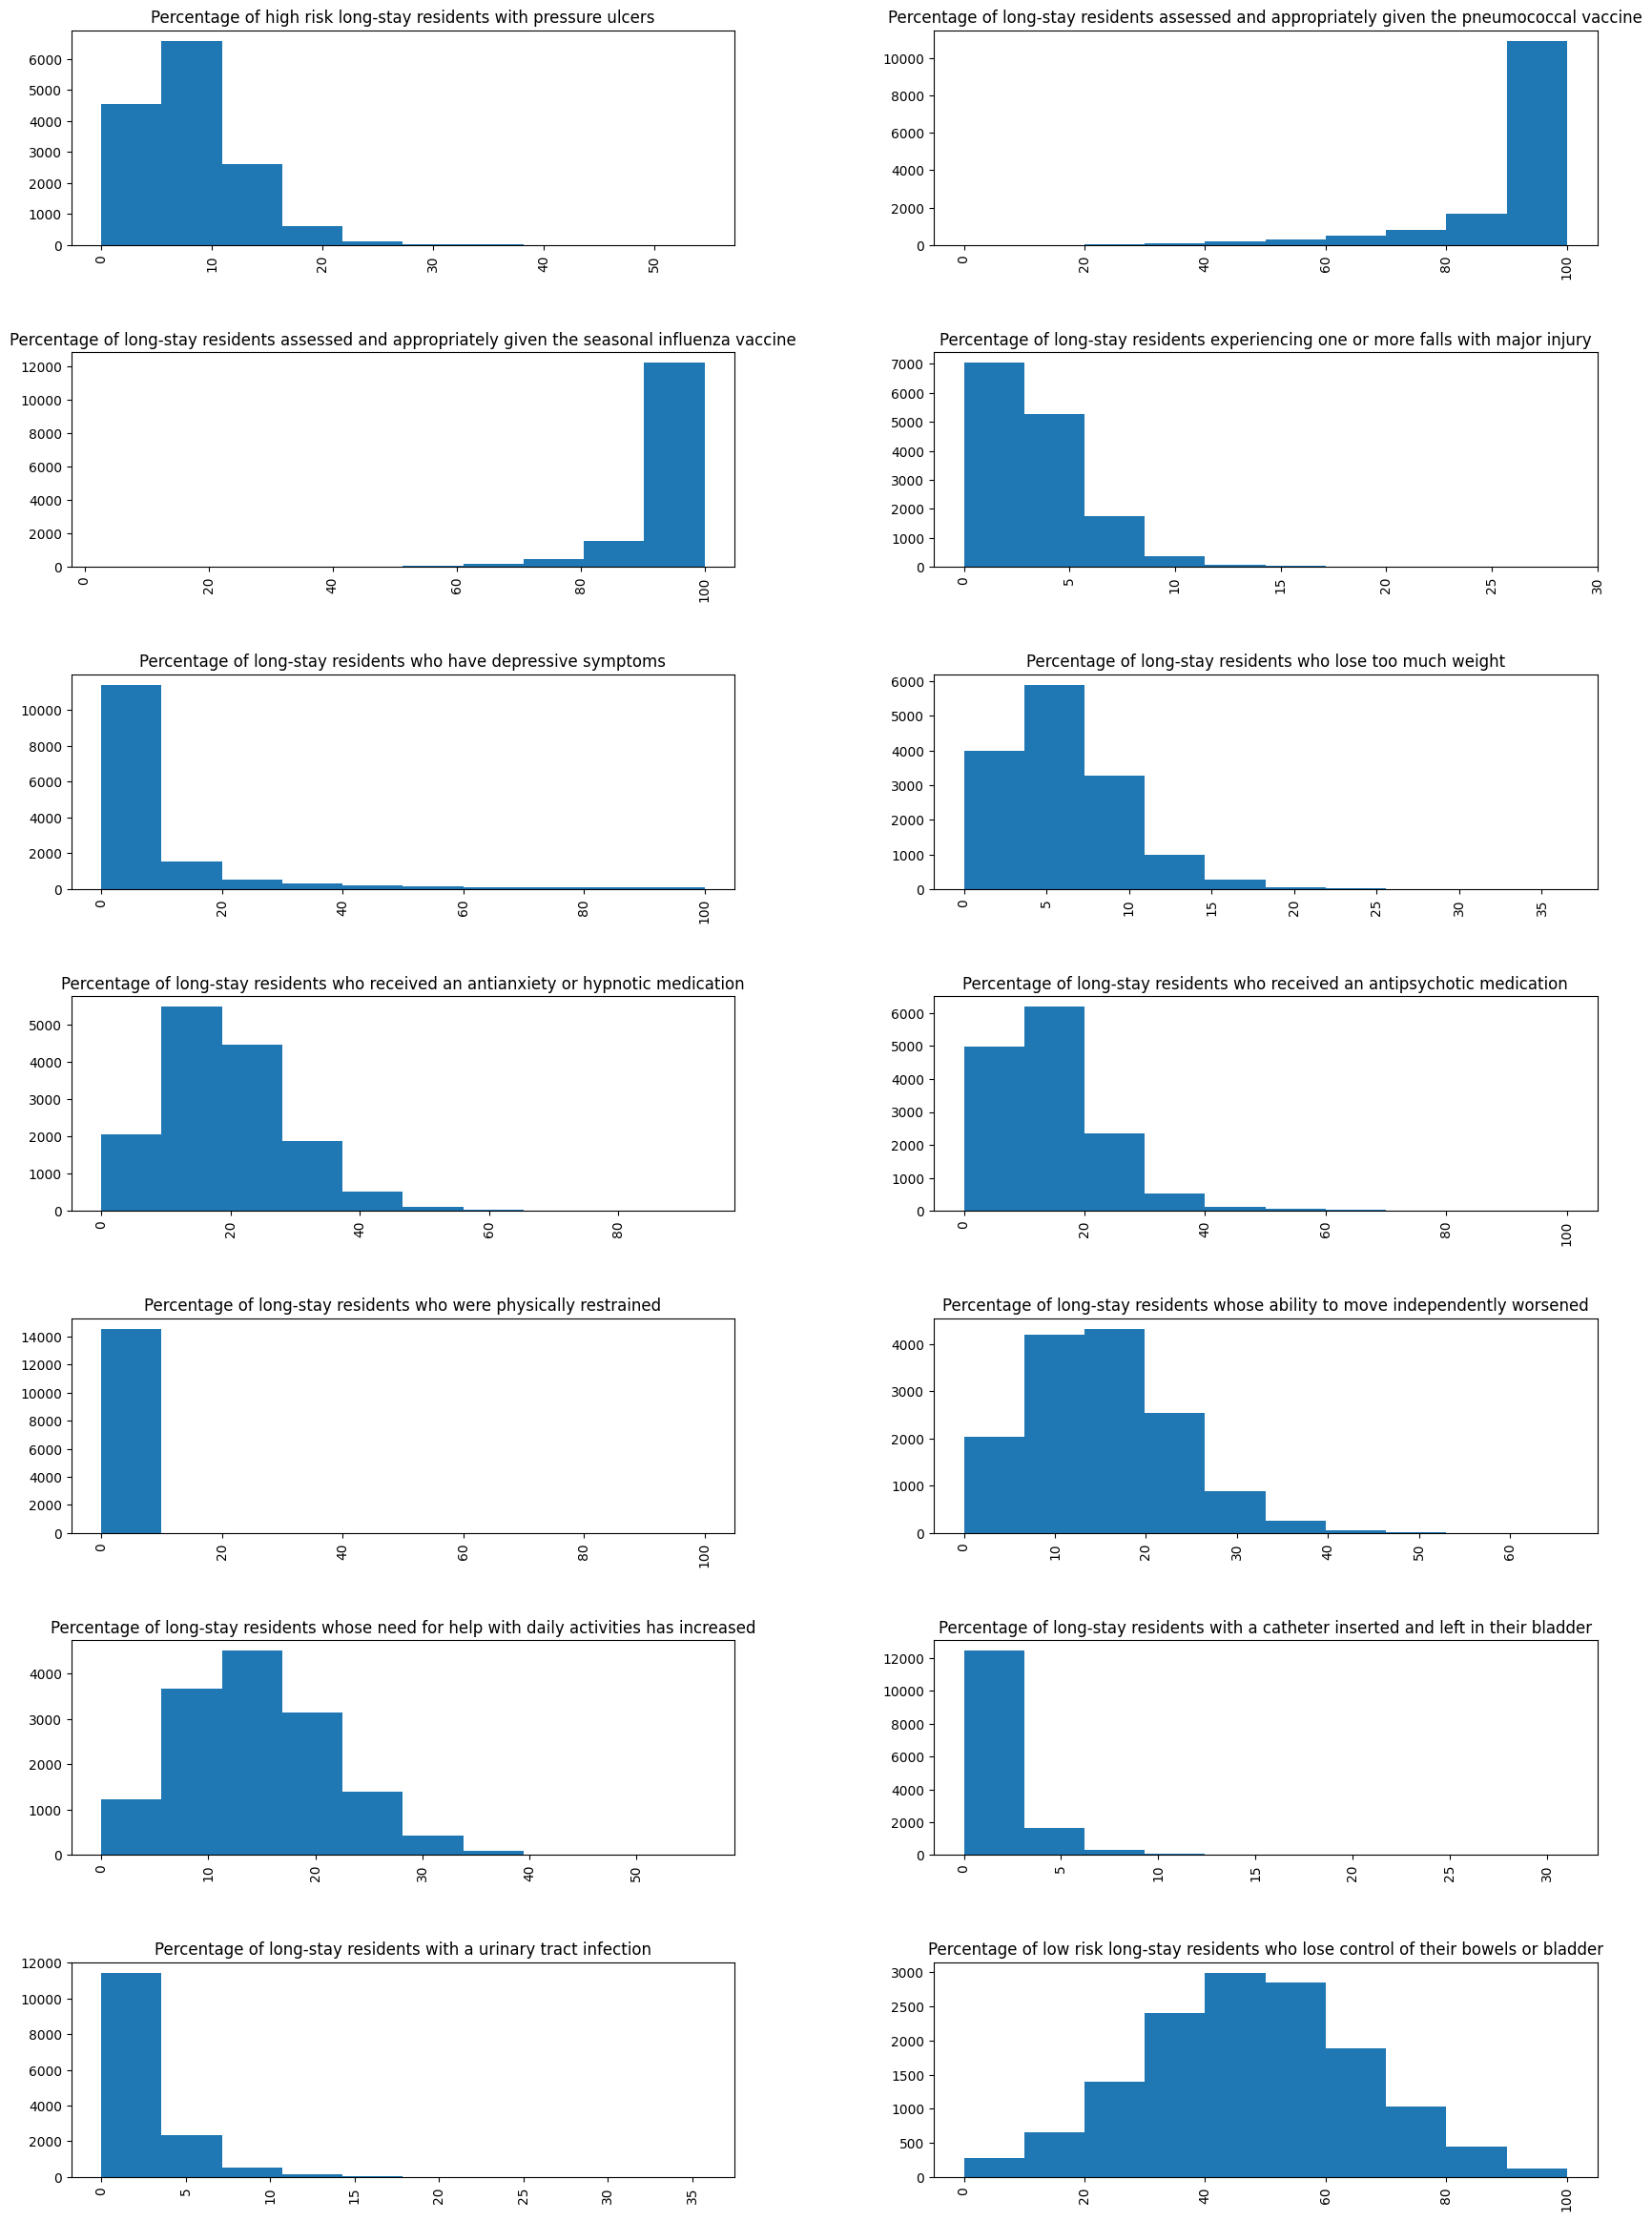

In [23]:
# Generate Histograms for Each Quality Measure

mds_subset.hist('Four Quarter Average Score', by='Measure Description',  figsize = (20, 30), layout = (7,2))

In [24]:
mds_final = mds_subset.copy()

### b) Survey Summary Table (August 2023)

In [25]:
# Preview Table
survey

CMS Certification Number (CCN)  \
0                             015009   
1                             015009   
2                             015009   
3                             015010   
4                             015010   
...                              ...   
44721                         745006   
44722                         745006   
44723                         745007   
44724                         745017   
44725                         745021   

                                  Provider Name        Provider Address  \
0                      BURNS NURSING HOME, INC.    701 MONROE STREET NW   
1                      BURNS NURSING HOME, INC.    701 MONROE STREET NW   
2                      BURNS NURSING HOME, INC.    701 MONROE STREET NW   
3                COOSA VALLEY HEALTHCARE CENTER  260 WEST WALNUT STREET   
4                COOSA VALLEY HEALTHCARE CENTER  260 WEST WALNUT STREET   
...                                         ...                     ...   
44721    FIVE POINTS NURSING AND REHABILITATION     1901 N. HAMPTON RD.   
44722    FIVE POINTS NURSING AND REHABILITATION     1901 N. HAMPTON RD.   
44723  VERNON REHABILITATION AND NURSING CENTER       4301 HOSPITAL DR.   
44724  THE LODGE OF SAGINAW HEALTH AND WELLNESS      848 W MCLEROY BLVD   
44725             LINDALE SPECIALTY CARE CENTER           13905 FM 2710   

          City/Town State  ZIP Code  Inspection Cycle Health Survey Date  \
0      RUSSELLVILLE    AL     35653                 1         2023-03-02   
1      RUSSELLVILLE    AL     35653                 2         2019-08-21   
2      RUSSELLVILLE    AL     35653                 3         2018-08-01   
3         SYLACAUGA    AL     35150                 1         2022-04-09   
4         SYLACAUGA    AL     35150                 2         2019-06-13   
...             ...   ...       ...               ...                ...   
44721        DESOTO    TX     75115                 1         2023-02-23   
44722        DESOTO    TX     75115                 2         2021-12-01   
44723        VERNON    TX     76384                 1         2022-10-06   
44724       SAGINAW    TX     76179                 1         2022-06-29   
44725       LINDALE    TX     75771                 1         2022-07-25   

      Fire Safety Survey Date  Total Number of Health Deficiencies  ...  \
0                  2023-02-15                                    4  ...   
1                  2019-08-21                                    2  ...   
2                  2018-08-09                                    1  ...   
3                  2022-04-13                                    0  ...   
4                  2019-06-18                                    1  ...   
...                       ...                                  ...  ...   
44721              2023-02-23                                    6  ...   
44722              2021-12-01                                    0  ...   
44723              2022-06-22                                    0  ...   
44724              2022-06-29                                    0  ...   
44725              2022-06-10                                    0  ...   

       Count of Interior Deficiencies  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   
...                               ...   
44721                             0.0   
44722                             0.0   
44723                             0.0   
44724                             0.0   
44725                             0.0   

       Count of Gas and Vacuum and Electrical Systems Deficiencies  \
0                                                    0.0             
1                                                    0.0             
2                                                    0.0             
3                                    

There are 44,726 rows and 41 columns. 

In [26]:
# Show Column Names
survey.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Inspection Cycle',
       'Health Survey Date', 'Fire Safety Survey Date',
       'Total Number of Health Deficiencies',
       'Total Number of Fire Safety Deficiencies',
       'Count of Freedom from Abuse and Neglect and Exploitation Deficiencies',
       'Count of Quality of Life and Care Deficiencies',
       'Count of Resident Assessment and Care Planning Deficiencies',
       'Count of Nursing and Physician Services Deficiencies',
       'Count of Resident Rights Deficiencies',
       'Count of Nutrition and Dietary Deficiencies',
       'Count of Pharmacy Service Deficiencies',
       'Count of Environmental Deficiencies',
       'Count of Administration Deficiencies',
       'Count of Infection Control Deficiencies',
       'Count of Emergency Preparedness Deficiencies',
       'Count of Automatic Sprinkler Systems Deficiencies',
       'Count of Construction

From the Data Dictionary, the table shows inspections reports for the last three inspection cycles of each Nursing Home, with the most resend being `1` in the field `'Inspection Cycle'`  

For the purposes of this project we will look at the most recent inspection cycle only.

In [27]:
survey_recent = survey[survey['Inspection Cycle'] == 1]

In [28]:
len(survey_recent)

14993

This brought the table down to 14,993 rows. The same number of rows as there are nursing homes in the MDS table.  

Next I will verify by CCN that no facility has been duplicated.

In [29]:
survey_recent[survey_recent.duplicated('CMS Certification Number (CCN)')]

Empty DataFrame
Columns: [CMS Certification Number (CCN), Provider Name, Provider Address, City/Town, State, ZIP Code, Inspection Cycle, Health Survey Date, Fire Safety Survey Date, Total Number of Health Deficiencies, Total Number of Fire Safety Deficiencies, Count of Freedom from Abuse and Neglect and Exploitation Deficiencies, Count of Quality of Life and Care Deficiencies, Count of Resident Assessment and Care Planning Deficiencies, Count of Nursing and Physician Services Deficiencies, Count of Resident Rights Deficiencies, Count of Nutrition and Dietary Deficiencies, Count of Pharmacy Service Deficiencies, Count of Environmental Deficiencies, Count of Administration Deficiencies, Count of Infection Control Deficiencies, Count of Emergency Preparedness Deficiencies, Count of Automatic Sprinkler Systems Deficiencies, Count of Construction Deficiencies, Count of Services Deficiencies, Count of Corridor Walls and Doors Deficiencies, Count of Egress Deficiencies, Count of Electrical Deficiencies, Count of Emergency Plans and Fire Drills Deficiencies, Count of Fire Alarm Systems Deficiencies, Count of Smoke Deficiencies, Count of Interior Deficiencies, Count of Gas and Vacuum and Electrical Systems Deficiencies, Count of Hazardous Area Deficiencies, Count of Illumination and Emergency Power Deficiencies, Count of Laboratories Deficiencies, Count of Medical Gases and Anaesthetizing Areas Deficiencies, Count of Smoking Regulations Deficiencies, Count of Miscellaneous Deficiencies, Location, Processing Date]
Index: []

[0 rows x 41 columns]

No facility has been duplicated, meaning each row is now the most recent survey results for a facility.

In [30]:
# Explore Descriptive Stats for each Column
# Note: Descriptive stats for ZIP Code and Inspection Cycle is not meaningful as it is not true numerical data.

survey_recent.describe().T

count          mean  \
ZIP Code                                            14993.0  50345.566664   
Inspection Cycle                                    14993.0      1.000000   
Total Number of Health Deficiencies                 14993.0      7.102648   
Total Number of Fire Safety Deficiencies            14992.0      4.684565   
Count of Freedom from Abuse and Neglect and Exp...  14993.0      0.288335   
Count of Quality of Life and Care Deficiencies      14993.0      1.832388   
Count of Resident Assessment and Care Planning ...  14993.0      1.091910   
Count of Nursing and Physician Services Deficie...  14993.0      0.254252   
Count of Resident Rights Deficiencies               14993.0      1.078637   
Count of Nutrition and Dietary Deficiencies         14993.0      0.745014   
Count of Pharmacy Service Deficiencies              14993.0      0.847129   
Count of Environmental Deficiencies                 14993.0      0.193824   
Count of Administration Deficiencies                14993.0      0.201694   
Count of Infection Control Deficiencies             14993.0      0.569466   
Count of Emergency Preparedness Deficiencies        14992.0      0.524613   
Count of Automatic Sprinkler Systems Deficiencies   14992.0      0.000000   
Count of Construction Deficiencies                  14992.0      0.110192   
Count of Services Deficiencies                      14992.0      0.287553   
Count of Corridor Walls and Doors Deficiencies      14992.0      0.000000   
Count of Egress Deficiencies                        14992.0      0.618597   
Count of Electrical Deficiencies                    14992.0      0.008871   
Count of Emergency Plans and Fire Drills Defici...  14992.0      0.000000   
Count of Fire Alarm Systems Deficiencies            14992.0      0.000000   
Count of Smoke Deficiencies                         14992.0      1.812900   
Count of Interior Deficiencies                      14992.0      0.000000   
Count of Gas and Vacuum and Electrical Systems ...  14992.0      0.826107   
Count of Hazardous Area Deficiencies                14992.0      0.000000   
Count of Illumination and Emergency Power Defic...  14992.0      0.000000   
Count of Laboratories Deficiencies                  14992.0      0.000000   
Count of Medical Gases and Anaesthetizing Areas...  14992.0      0.000067   
Count of Smoking Regulations Deficiencies           14992.0      0.000000   
Count of Miscellaneous Deficiencies                 14992.0      0.495664   

                                                             std    min  \
ZIP Code                                            26851.753252  660.0   
Inspection Cycle                                        0.000000    1.0   
Total Number of Health Deficiencies                     6.216066    0.0   
Total Number of Fire Safety Deficiencies                4.752702    0.0   
Count of Freedom from Abuse and Neglect and Exp...      0.701164    0.0   
Count of Quality of Life and Care Deficiencies          1.972594    0.0   
Count of Resident Assessment and Care Planning ...      1.354893    0.0   
Count of Nursing and Physician Services Deficie...      0.597643    0.0   
Count of Resident Rights Deficiencies                   1.466731    0.0   
Count of Nutrition and Dietary Deficiencies             1.026600    0.0   
Count of Pharmacy Service Deficiencies                  1.094447    0.0   
Count of Environmental Deficiencies                     0.489943    0.0   
Count of Administration Deficiencies                    0.568428    0.0   
Count of Infection Control Deficiencies                 0.811384    0.0   
Count of Emergency Preparedness Deficiencies            1.458951    0.0   
Count of Automatic Sprinkler Systems Deficiencies       0.000000    0.0   
Count of Construction Deficiencies                      0.333363    0.0   
Count of Services Deficiencies                          0.550278    0.0   
Count of Corridor Walls and Doors Deficiencies          0.000000    0.0   
Count of Egr

Many of the columns have no deficiencies in that category for any nursing home. We will remove those columns

In [31]:
x = survey_recent.describe().T
zero_columns = x[(x['max'] == 0) & (x['max'] == 0)].index
survey_dropzero = survey_recent.drop(columns = zero_columns)

In [32]:
survey_dropzero.describe().T

count          mean  \
ZIP Code                                            14993.0  50345.566664   
Inspection Cycle                                    14993.0      1.000000   
Total Number of Health Deficiencies                 14993.0      7.102648   
Total Number of Fire Safety Deficiencies            14992.0      4.684565   
Count of Freedom from Abuse and Neglect and Exp...  14993.0      0.288335   
Count of Quality of Life and Care Deficiencies      14993.0      1.832388   
Count of Resident Assessment and Care Planning ...  14993.0      1.091910   
Count of Nursing and Physician Services Deficie...  14993.0      0.254252   
Count of Resident Rights Deficiencies               14993.0      1.078637   
Count of Nutrition and Dietary Deficiencies         14993.0      0.745014   
Count of Pharmacy Service Deficiencies              14993.0      0.847129   
Count of Environmental Deficiencies                 14993.0      0.193824   
Count of Administration Deficiencies                14993.0      0.201694   
Count of Infection Control Deficiencies             14993.0      0.569466   
Count of Emergency Preparedness Deficiencies        14992.0      0.524613   
Count of Construction Deficiencies                  14992.0      0.110192   
Count of Services Deficiencies                      14992.0      0.287553   
Count of Egress Deficiencies                        14992.0      0.618597   
Count of Electrical Deficiencies                    14992.0      0.008871   
Count of Smoke Deficiencies                         14992.0      1.812900   
Count of Gas and Vacuum and Electrical Systems ...  14992.0      0.826107   
Count of Medical Gases and Anaesthetizing Areas...  14992.0      0.000067   
Count of Miscellaneous Deficiencies                 14992.0      0.495664   

                                                             std    min  \
ZIP Code                                            26851.753252  660.0   
Inspection Cycle                                        0.000000    1.0   
Total Number of Health Deficiencies                     6.216066    0.0   
Total Number of Fire Safety Deficiencies                4.752702    0.0   
Count of Freedom from Abuse and Neglect and Exp...      0.701164    0.0   
Count of Quality of Life and Care Deficiencies          1.972594    0.0   
Count of Resident Assessment and Care Planning ...      1.354893    0.0   
Count of Nursing and Physician Services Deficie...      0.597643    0.0   
Count of Resident Rights Deficiencies                   1.466731    0.0   
Count of Nutrition and Dietary Deficiencies             1.026600    0.0   
Count of Pharmacy Service Deficiencies                  1.094447    0.0   
Count of Environmental Deficiencies                     0.489943    0.0   
Count of Administration Deficiencies                    0.568428    0.0   
Count of Infection Control Deficiencies                 0.811384    0.0   
Count of Emergency Preparedness Deficiencies            1.458951    0.0   
Count of Construction Deficiencies                      0.333363    0.0   
Count of Services Deficiencies                          0.550278    0.0   
Count of Egress Deficiencies                            0.938903    0.0   
Count of Electrical Deficiencies                        0.093773    0.0   
Count of Smoke Deficiencies                             1.881419    0.0   
Count of Gas and Vacuum and Electrical Systems ...      1.074928    0.0   
Count of Medical Gases and Anaesthetizing Areas...      0.008167    0.0   
Count of Miscellaneous Deficiencies                     0.792690    0.0   

                                                        25%      50%      75%  \
ZIP Code                                            29835.0  48624.0  73010.0   
Inspection Cycle                                        1.0      1.0      1.0   
Total Number of Health Deficiencies                     3.0      6.0     10.0   
Total Number of Fire Safety Deficiencies                1.0      3.0      7.0   

In [33]:
# Count NA Values

for column in survey_dropzero.columns:
    if survey_dropzero[column].isna().sum() != 0:
        print(column, ': ', survey_dropzero[column].isna().sum())

Fire Safety Survey Date :  1
Total Number of Fire Safety Deficiencies :  1
Count of Emergency Preparedness Deficiencies :  1
Count of Construction Deficiencies :  1
Count of Services Deficiencies :  1
Count of Egress Deficiencies :  1
Count of Electrical Deficiencies :  1
Count of Smoke Deficiencies :  1
Count of Gas and Vacuum and Electrical Systems Deficiencies :  1
Count of Medical Gases and Anaesthetizing Areas Deficiencies :  1
Count of Miscellaneous Deficiencies :  1


All fire safety survey related columns have 1 row with missing data.  

As these types of deficiencies would not be expected to influence hospitalization rates, I will remove these columns.  

In [34]:
survey_dropfire = survey_dropzero.drop(columns = ['Fire Safety Survey Date', 
                                                  'Total Number of Fire Safety Deficiencies',
                                                  'Count of Emergency Preparedness Deficiencies',
                                                  'Count of Construction Deficiencies',
                                                  'Count of Services Deficiencies',
                                                  'Count of Egress Deficiencies',
                                                  'Count of Electrical Deficiencies',
                                                  'Count of Smoke Deficiencies',
                                                  'Count of Gas and Vacuum and Electrical Systems Deficiencies',
                                                  'Count of Medical Gases and Anaesthetizing Areas Deficiencies',
                                                  'Count of Miscellaneous Deficiencies'])

In [35]:
survey_dropfire.describe().T

count          mean  \
ZIP Code                                            14993.0  50345.566664   
Inspection Cycle                                    14993.0      1.000000   
Total Number of Health Deficiencies                 14993.0      7.102648   
Count of Freedom from Abuse and Neglect and Exp...  14993.0      0.288335   
Count of Quality of Life and Care Deficiencies      14993.0      1.832388   
Count of Resident Assessment and Care Planning ...  14993.0      1.091910   
Count of Nursing and Physician Services Deficie...  14993.0      0.254252   
Count of Resident Rights Deficiencies               14993.0      1.078637   
Count of Nutrition and Dietary Deficiencies         14993.0      0.745014   
Count of Pharmacy Service Deficiencies              14993.0      0.847129   
Count of Environmental Deficiencies                 14993.0      0.193824   
Count of Administration Deficiencies                14993.0      0.201694   
Count of Infection Control Deficiencies             14993.0      0.569466   

                                                             std    min  \
ZIP Code                                            26851.753252  660.0   
Inspection Cycle                                        0.000000    1.0   
Total Number of Health Deficiencies                     6.216066    0.0   
Count of Freedom from Abuse and Neglect and Exp...      0.701164    0.0   
Count of Quality of Life and Care Deficiencies          1.972594    0.0   
Count of Resident Assessment and Care Planning ...      1.354893    0.0   
Count of Nursing and Physician Services Deficie...      0.597643    0.0   
Count of Resident Rights Deficiencies                   1.466731    0.0   
Count of Nutrition and Dietary Deficiencies             1.026600    0.0   
Count of Pharmacy Service Deficiencies                  1.094447    0.0   
Count of Environmental Deficiencies                     0.489943    0.0   
Count of Administration Deficiencies                    0.568428    0.0   
Count of Infection Control Deficiencies                 0.811384    0.0   

                                                        25%      50%      75%  \
ZIP Code                                            29835.0  48624.0  73010.0   
Inspection Cycle                                        1.0      1.0      1.0   
Total Number of Health Deficiencies                     3.0      6.0     10.0   
Count of Freedom from Abuse and Neglect and Exp...      0.0      0.0      0.0   
Count of Quality of Life and Care Deficiencies          0.0      1.0      3.0   
Count of Resident Assessment and Care Planning ...      0.0      1.0      2.0   
Count of Nursing and Physician Services Deficie...      0.0      0.0      0.0   
Count of Resident Rights Deficiencies                   0.0      1.0      2.0   
Count of Nutrition and Dietary Deficiencies             0.0      0.0      1.0   
Count of Pharmacy Service Deficiencies                  0.0      0.0      1.0   
Count of Environmental Deficiencies                     0.0      0.0      0.0   
Count of Administration Deficiencies                    0.0      0.0      0.0   
Count of Infection Control Deficiencies                 0.0      0.0      1.0   

                                                        max  
ZIP Code                                            99929.0  
Inspection Cycle                                        1.0  
Total Number of Health Deficiencies                    69.0  
Count of Freedom from Abuse and Neglect and Exp...      6.0  
Count of Quality of Life and Care Deficiencies         16.0  
Count of Resident Assessment and Care Planning ...     11.0  
Count of Nursing and Physician Services Deficie...      8.0  
Count of Resident Rights Deficiencies                  17.0  
Count of Nutrition and Dietary Deficiencies            11.0  
Count of Pharmacy Service Deficiencies                  7.0  
Count of Environmental Deficiencies                     5.0  
Count of Administration Deficiencies         

array([[<Axes: title={'center': 'ZIP Code'}>,
        <Axes: title={'center': 'Inspection Cycle'}>],
       [<Axes: title={'center': 'Total Number of Health Deficiencies'}>,
        <Axes: title={'center': 'Count of Freedom from Abuse and Neglect and Exploitation Deficiencies'}>],
       [<Axes: title={'center': 'Count of Quality of Life and Care Deficiencies'}>,
        <Axes: title={'center': 'Count of Resident Assessment and Care Planning Deficiencies'}>],
       [<Axes: title={'center': 'Count of Nursing and Physician Services Deficiencies'}>,
        <Axes: title={'center': 'Count of Resident Rights Deficiencies'}>],
       [<Axes: title={'center': 'Count of Nutrition and Dietary Deficiencies'}>,
        <Axes: title={'center': 'Count of Pharmacy Service Deficiencies'}>],
       [<Axes: title={'center': 'Count of Environmental Deficiencies'}>,
        <Axes: title={'center': 'Count of Administration Deficiencies'}>],
       [<Axes: title={'center': 'Count of Infection Control Defi

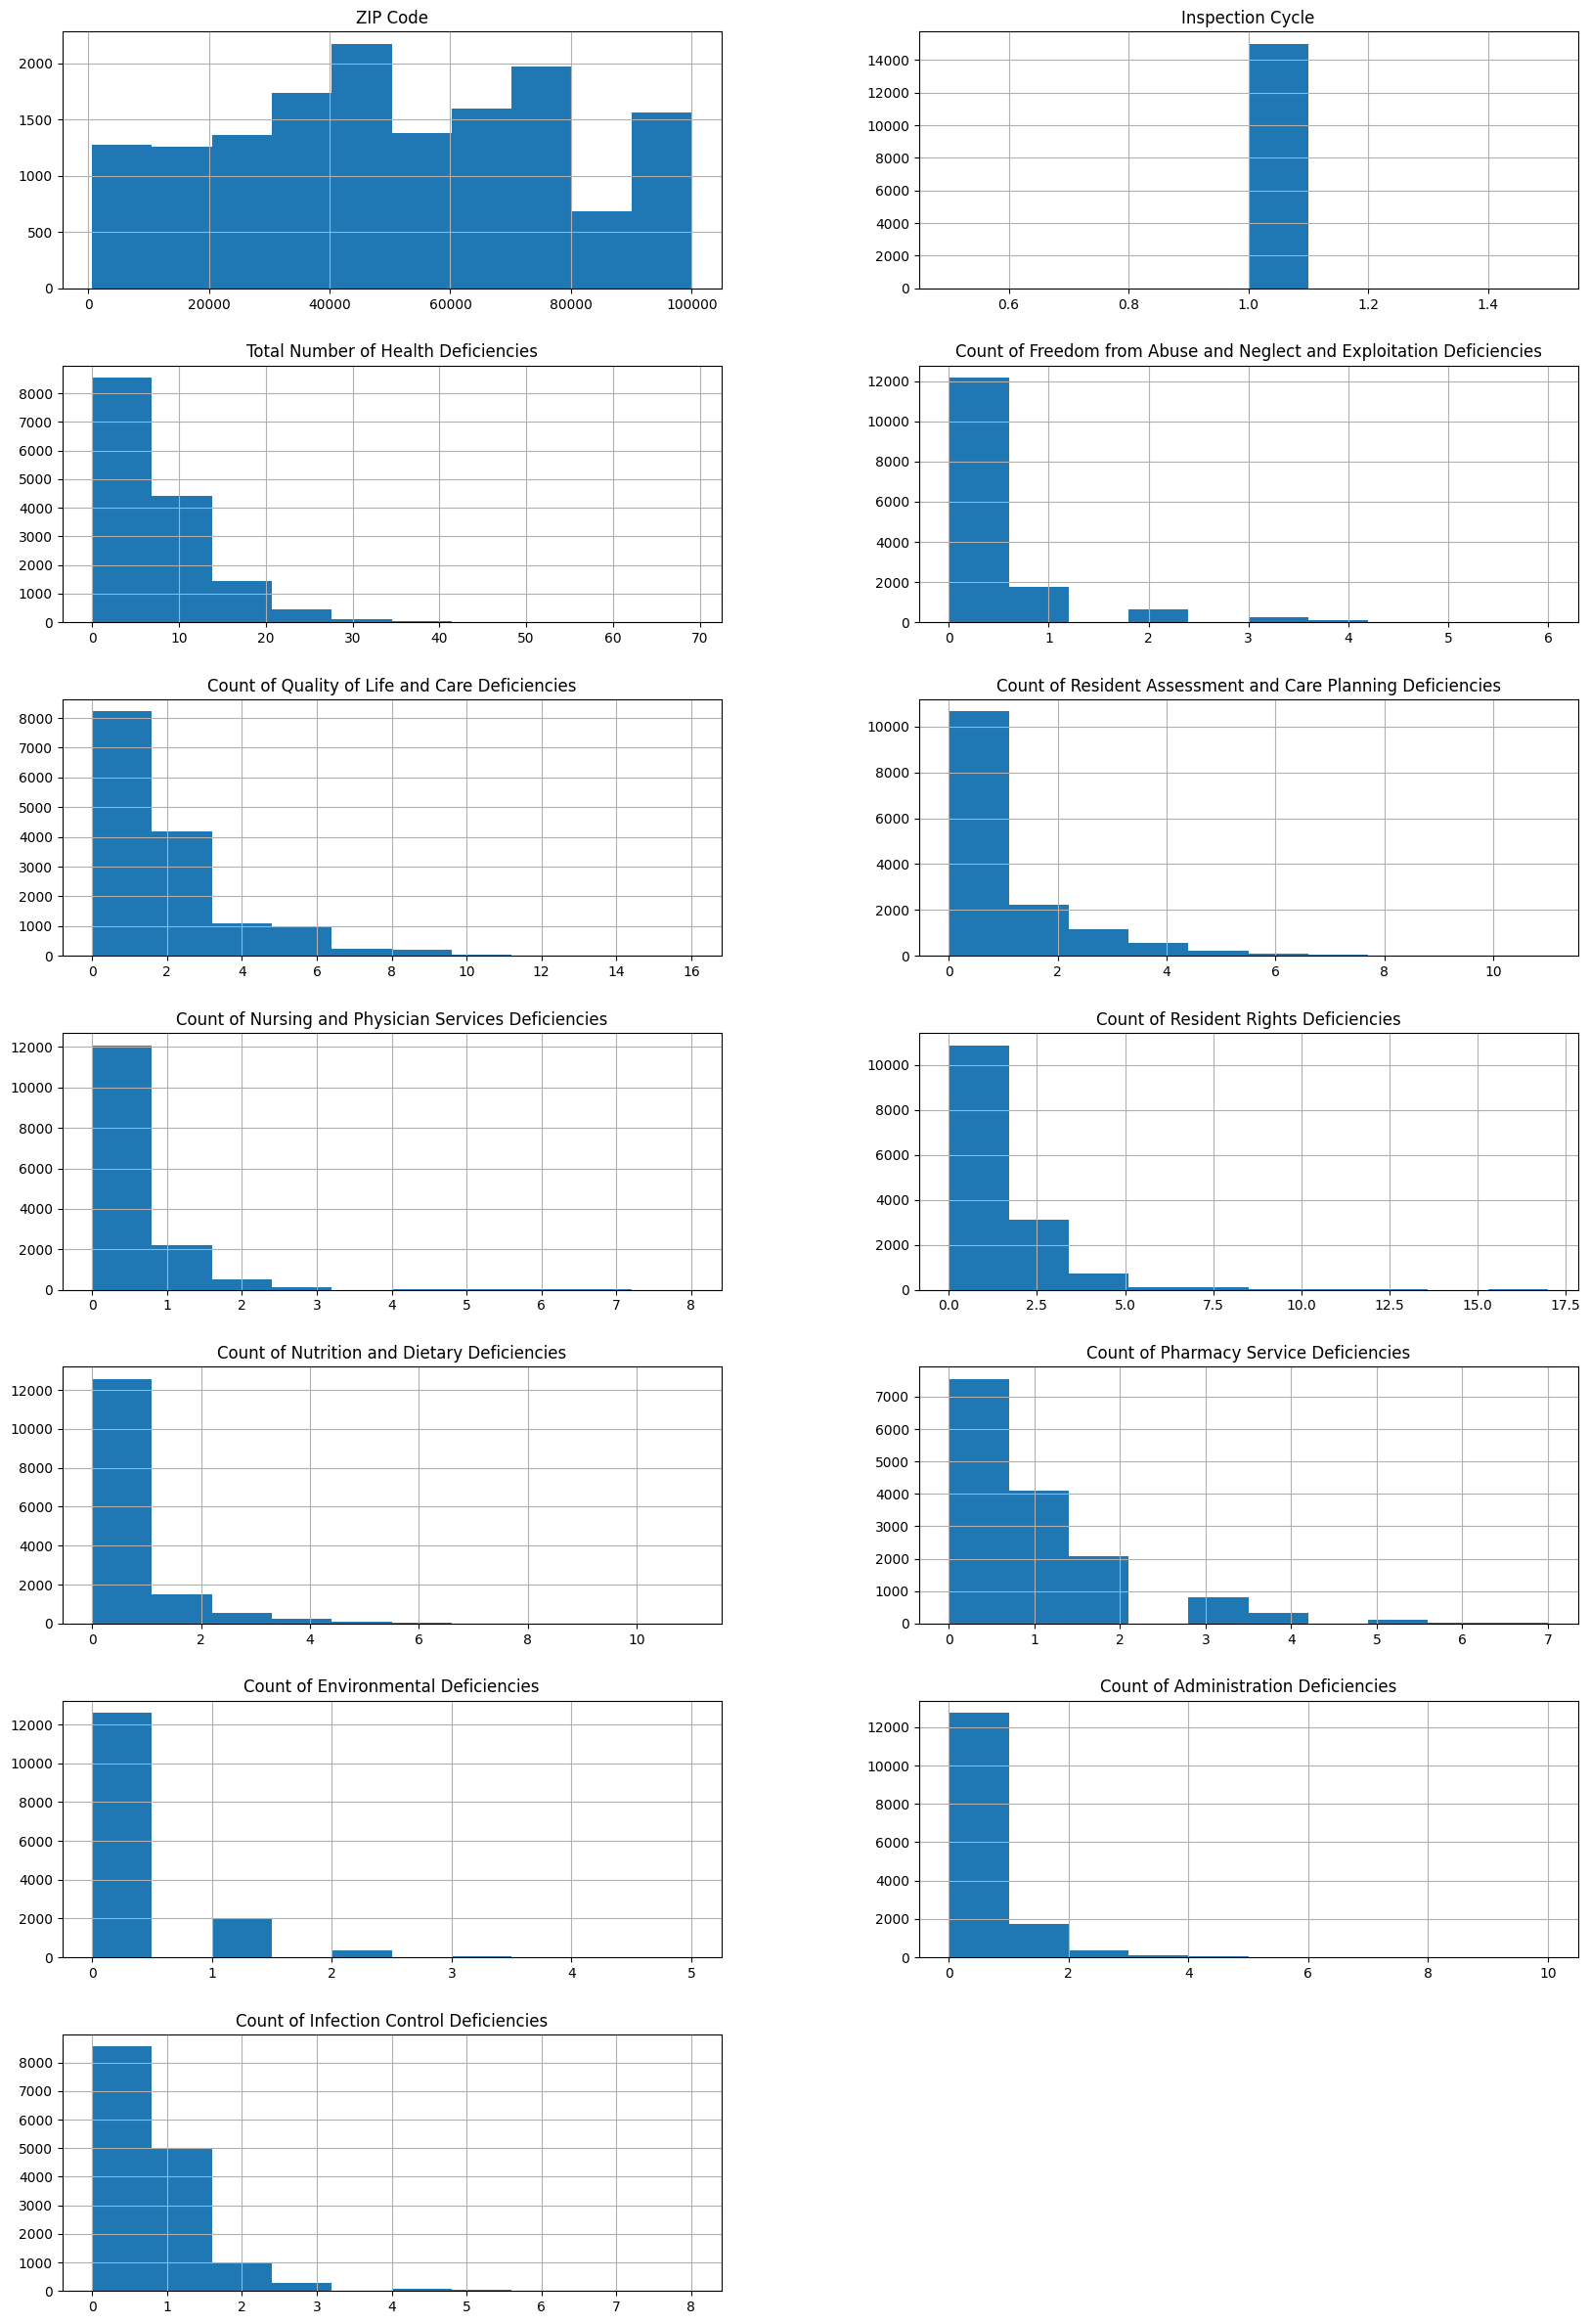

In [36]:
survey_dropfire.hist(figsize = (20, 30), layout = (-1,2))

In [37]:
# Drop columns not needed in final data set as they are redundant from other tables or contain constant information

survey_final = survey_dropfire.drop(columns = ['Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Inspection Cycle',
       'Health Survey Date', 'Location','Processing Date'])

### c) Medicare Claims Quality Measures (August 2023)

In [38]:
# Preview data 
claims

CMS Certification Number (CCN)  \
0                             015009   
1                             015009   
2                             015009   
3                             015009   
4                             015010   
...                              ...   
59967                         745017   
59968                         745021   
59969                         745021   
59970                         745021   
59971                         745021   

                                  Provider Name        Provider Address  \
0                      BURNS NURSING HOME, INC.    701 MONROE STREET NW   
1                      BURNS NURSING HOME, INC.    701 MONROE STREET NW   
2                      BURNS NURSING HOME, INC.    701 MONROE STREET NW   
3                      BURNS NURSING HOME, INC.    701 MONROE STREET NW   
4                COOSA VALLEY HEALTHCARE CENTER  260 WEST WALNUT STREET   
...                                         ...                     ...   
59967  THE LODGE OF SAGINAW HEALTH AND WELLNESS      848 W MCLEROY BLVD   
59968             LINDALE SPECIALTY CARE CENTER           13905 FM 2710   
59969             LINDALE SPECIALTY CARE CENTER           13905 FM 2710   
59970             LINDALE SPECIALTY CARE CENTER           13905 FM 2710   
59971             LINDALE SPECIALTY CARE CENTER           13905 FM 2710   

          City/Town State  ZIP Code  Measure Code  \
0      RUSSELLVILLE    AL     35653           521   
1      RUSSELLVILLE    AL     35653           522   
2      RUSSELLVILLE    AL     35653           551   
3      RUSSELLVILLE    AL     35653           552   
4         SYLACAUGA    AL     35150           521   
...             ...   ...       ...           ...   
59967       SAGINAW    TX     76179           552   
59968       LINDALE    TX     75771           521   
59969       LINDALE    TX     75771           522   
59970       LINDALE    TX     75771           551   
59971       LINDALE    TX     75771           552   

                                     Measure Description Resident type  \
0      Percentage of short-stay residents who were re...    Short Stay   
1      Percentage of short-stay residents who had an ...    Short Stay   
2      Number of hospitalizations per 1000 long-stay ...     Long Stay   
3      Number of outpatient emergency department visi...     Long Stay   
4      Percentage of short-stay residents who were re...    Short Stay   
...                                                  ...           ...   
59967  Number of outpatient emergency department visi...     Long Stay   
59968  Percentage of short-stay residents who were re...    Short Stay   
59969  Percentage of short-stay residents who had an ...    Short Stay   
59970  Number of hospitalizations per 1000 long-stay ...     Long Stay   
59971  Number of outpatient emergency department visi...     Long Stay   

       Adjusted Score  Observed Score  Expected Score  Footnote for Score  \
0           14.327333       14.634146       23.177170                 NaN   
1            4.968274        4.878049       10.695996                 NaN   
2            0.886661        0.656922        1.216808                 NaN   
3            0.439860        0.492692        1.729382                 NaN   
4           25.468589       26.923077       23.987125                 NaN   
...               ...             ...             ...                 ...   
59967             NaN             NaN             NaN                 9.0   
59968       30.320368       31.707317       23.729217                 NaN   
59969       19.519860       19.512195       10.889553                 NaN   
59970             NaN             NaN             NaN                 9.0   
59971             NaN             NaN             NaN                 9.0   

      Used in Quality Measure Five Star Rating     Measure Period  \
0                                            Y  20220101-20221231   
1                                  

In [39]:
# Column Names
claims.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Measure Code', 'Measure Description',
       'Resident type', 'Adjusted Score', 'Observed Score', 'Expected Score',
       'Footnote for Score', 'Used in Quality Measure Five Star Rating',
       'Measure Period', 'Location', 'Processing Date'],
      dtype='object')

There are a total of 59,972 rows and 17 columns in this table with each row represesenting results for one measure for a nursing home for a specific resident type.  

Review the resident type breakdown, and measure description:

In [40]:
count_proportion(claims['Resident type'])

count  proportion
Resident type                   
Short Stay     29986         0.5
Long Stay      29986         0.5

In [41]:
count_proportion(claims['Measure Description'])

count  proportion
Measure Description                                                  
Percentage of short-stay residents who were reh...  14993        0.25
Percentage of short-stay residents who had an o...  14993        0.25
Number of hospitalizations per 1000 long-stay r...  14993        0.25
Number of outpatient emergency department visit...  14993        0.25

For this project we are interested in long stay residents only and our target meaure "Number of hospitalizations per 1000 long-stay resident days"  

In [42]:
# Create a filtered Data Frame containing relevant rows to the project

claims_filtered = claims.loc[(claims['Resident type'] == 'Long Stay') & 
           (claims['Measure Description'] == 'Number of hospitalizations per 1000 long-stay resident days')]

In [43]:
claims_filtered.shape

(14993, 17)

Filtered table has 14,993 rows. This is the same as the number of facilities in the previous tables.

Next we will look at Footnote for Score to see reasons for missing data.

In [44]:
count_proportion(claims_filtered['Footnote for Score'])

count  proportion
Footnote for Score                   
NaN                 12111    0.807777
9.0                  2624    0.175015
10.0                  258    0.017208

Reasons for missing data include the following (footnote codes referenced to Data Dictionary):  

9 - The number of residents too small to report  
10 - Missing or not submitted  

To check we will make sure all scores with a footnote are indeed missing

In [45]:
print('\033[1mMeasure Score Values for Footnote Code 9 - Number of Residents too small to report\n\033[0m')

print(count_proportion(claims_filtered.loc[claims_filtered['Footnote for Score'] == 9, 'Adjusted Score']))
print(count_proportion(claims_filtered.loc[claims_filtered['Footnote for Score'] == 9, 'Observed Score']))
print(count_proportion(claims_filtered.loc[claims_filtered['Footnote for Score'] == 9, 'Expected Score']))

print('\nAs expected all measure values are NaN when footnote code is 10\n')

print('\033[1mMeasure Score Values for Footnote Code 10 - Missing or not submitted\n\033[0m')

print(count_proportion(claims_filtered.loc[claims_filtered['Footnote for Score'] == 10, 'Adjusted Score']))
print(count_proportion(claims_filtered.loc[claims_filtered['Footnote for Score'] == 10, 'Observed Score']))
print(count_proportion(claims_filtered.loc[claims_filtered['Footnote for Score'] == 10, 'Expected Score']))


print('\nAs expected all measure values are NaN when footnote code is 10\n')

Measure Score Values for Footnote Code 9 - Number of Residents too small to report

                count  proportion
Adjusted Score                   
NaN              2624         1.0
                count  proportion
Observed Score                   
NaN              2624         1.0
                count  proportion
Expected Score                   
NaN              2624         1.0

As expected all measure values are NaN when footnote code is 10

Measure Score Values for Footnote Code 10 - Missing or not submitted

                count  proportion
Adjusted Score                   
NaN               258         1.0
                count  proportion
Observed Score                   
NaN               258         1.0
                count  proportion
Expected Score                   
NaN               258         1.0

As expected all measure values are NaN when footnote code is 10



In [46]:
# As this is our target, we will remove all rows with null values

claims_valid = claims_filtered.dropna(subset = ['Observed Score'], ignore_index = True)

In [47]:
claims_valid.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Measure Code', 'Measure Description',
       'Resident type', 'Adjusted Score', 'Observed Score', 'Expected Score',
       'Footnote for Score', 'Used in Quality Measure Five Star Rating',
       'Measure Period', 'Location', 'Processing Date'],
      dtype='object')

Check the count of values in Measure Code, Used in Quality Measure Five Star Rating, and Measure Period.  

In [48]:
count_proportion(claims_valid['Measure Code'])

count  proportion
Measure Code                   
551           12111         1.0

In [49]:
count_proportion(claims_valid['Used in Quality Measure Five Star Rating'])

count  proportion
Used in Quality Measure Five Star Rating                   
Y                                         12111         1.0

In [50]:
count_proportion(claims_valid['Measure Period'])

count  proportion
Measure Period                      
20220101-20221231  12111         1.0

As expected, these columns all had the same value and can be dropped.  

Of importance to note for reporting purposes, is the measure period.  

We will now remove rows not needed from this Data Frame for this project.  

For this score we will use adjusted score as it is risk-adjusted, as some nursing homes may have patients that are of differing risk for hospitalizations and makes it easier to compare across nursing homes.  

In [51]:
claims_subset = claims_valid[['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Expected Score']].rename(
    columns = {'Expected Score' : 'Adjusted Hospitalization Rate'}) # Rename target column name

In [52]:
# Show Descriptive Statistics

claims_subset['Adjusted Hospitalization Rate'].describe()

count    12111.000000
mean         1.554169
std          0.544113
min          0.669960
25%          1.243850
50%          1.455969
75%          1.733384
max         27.328443
Name: Adjusted Hospitalization Rate, dtype: float64

<Axes: >

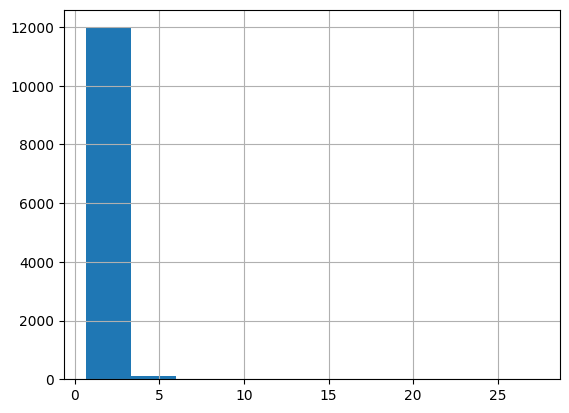

In [53]:
# Show Histogram

claims_subset['Adjusted Hospitalization Rate'].hist()

In [54]:
# Drop columns not needed in final claims table as they are redundant in other tables

claims_final = claims_subset.drop(columns = ['Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code'])

### d) Provider Information Table (August 2023)

In [55]:
# Preview data
provider

CMS Certification Number (CCN)  \
0                             015009   
1                             015010   
2                             015012   
3                             015014   
4                             015015   
...                              ...   
14988                         745005   
14989                         745006   
14990                         745007   
14991                         745017   
14992                         745021   

                                     Provider Name  \
0                         BURNS NURSING HOME, INC.   
1                   COOSA VALLEY HEALTHCARE CENTER   
2                       HIGHLANDS HEALTH AND REHAB   
3      EASTVIEW REHABILITATION & HEALTHCARE CENTER   
4                    PLANTATION MANOR NURSING HOME   
...                                            ...   
14988                      CENTER AT ZARAGOZA, LLC   
14989       FIVE POINTS NURSING AND REHABILITATION   
14990     VERNON REHABILITATION AND NURSING CENTER   
14991     THE LODGE OF SAGINAW HEALTH AND WELLNESS   
14992                LINDALE SPECIALTY CARE CENTER   

                  Provider Address     City/Town State  ZIP Code  \
0             701 MONROE STREET NW  RUSSELLVILLE    AL     35653   
1           260 WEST WALNUT STREET     SYLACAUGA    AL     35150   
2              380 WOODS COVE ROAD    SCOTTSBORO    AL     35768   
3         7755 FOURTH AVENUE SOUTH    BIRMINGHAM    AL     35206   
4      6450 OLD TUSCALOOSA HIGHWAY      MC CALLA    AL     35111   
...                            ...           ...   ...       ...   
14988     12660 PEBBLE HILLS BLVD.       EL PASO    TX     79938   
14989          1901 N. HAMPTON RD.        DESOTO    TX     75115   
14990            4301 HOSPITAL DR.        VERNON    TX     76384   
14991           848 W MCLEROY BLVD       SAGINAW    TX     76179   
14992                13905 FM 2710       LINDALE    TX     75771   

       Telephone Number  Provider SSA County Code County/Parish  \
0            2563324110                       290      Franklin   
1            2562495604                       600     Talladega   
2            2562183708                       350       Jackson   
3            2058330146                       360     Jefferson   
4            2054776161                       360     Jefferson   
...                 ...                       ...           ...   
14988        9159901700                       480       El Paso   
14989        9726949810                       390        Dallas   
14990        9405522568                       961     Wilbarger   
14991        6859001210                       910       Tarrant   
14992        4302602300                       892         Smith   

                               Ownership Type  ...  \
0                    For profit - Corporation  ...   
1                    For profit - Corporation  ...   
2                         Government - County  ...   
3                     For profit - Individual  ...   
4                     For profit - Individual  ...   
...                                       ...  ...   
14988                For profit - Corporation  ...   
14989                For profit - Corporation  ...   
14990                For profit - Corporation  ...   
14991                For profit - Corporation  ...   
14992  For profit - Limited Liability company  ...   

       Number of Citations from Infection Control Inspections  \
0                                                    NaN        
1                                                    0.0        
2                                                    0.0        
3                                                    0.0        
4                                                    NaN        
...                                                  ...        
14988                                                0.0        
14989                                                1.0        
14990               

In [56]:
# Show lsit of columns
provider.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Telephone Number',
       'Provider SSA County Code', 'County/Parish', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital', 'Legal Business Name',
       'Date First Approved to Provide Medicare and Medicaid Services',
       'Affiliated Entity Name', 'Affiliated Entity ID',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Automatic Sprinkler Systems in All Required Areas', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating

Rating Cycle 1 represents data from the most recent survey. For purposes of this project we will remove columns that represent data from Rating Cycle 2 or 3.  

Staffing ratio data is provided in three versions, raw reported values, case-mix values, and adjusted values. The adjusted values account for differences in client severity. For this project we will use adjusted values. (source: https://www.cms.gov/Medicare/Provider-Enrollment-and-Certification/CertificationandComplianc/downloads/usersguide.pdf)

Next we will create a subset of columns with relevant data to the project.  

In [57]:
provider_subset = provider[['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Average Number of Residents per Day Footnote', 'Provider Type',
       'Provider Resides in Hospital',
       'Continuing Care Retirement Community', 'Special Focus Status',
       'Abuse Icon', 'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council', 'Overall Rating',
       'Overall Rating Footnote', 'Health Inspection Rating',
       'Health Inspection Rating Footnote', 'QM Rating', 'QM Rating Footnote',
       'Long-Stay QM Rating', 'Long-Stay QM Rating Footnote',
       'Staffing Rating', 'Staffing Rating Footnote',
       'Reported Staffing Footnote',
       'Total nursing staff turnover', 'Total nursing staff turnover footnote',
       'Registered Nurse turnover', 'Registered Nurse turnover footnote',
       'Number of administrators who have left the nursing home',
       'Administrator turnover footnote',
       'Adjusted Nurse Aide Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
       'Adjusted Weekend Total Nurse Staffing Hours per Resident per Day',
       'Rating Cycle 1 Standard Survey Health Date',
       'Rating Cycle 1 Total Number of Health Deficiencies',
       'Rating Cycle 1 Number of Standard Health Deficiencies',
       'Rating Cycle 1 Number of Complaint Health Deficiencies',
       'Rating Cycle 1 Health Deficiency Score',
       'Rating Cycle 1 Number of Health Revisits',
       'Rating Cycle 1 Health Revisit Score',
       'Rating Cycle 1 Total Health Score',
       'Total Weighted Health Survey Score',
       'Number of Facility Reported Incidents',
       'Number of Substantiated Complaints',
       'Number of Citations from Infection Control Inspections',
       'Number of Fines', 'Total Amount of Fines in Dollars',
       'Total Number of Penalties']]

In [58]:
# Check Datatypes
provider_subset.dtypes

CMS Certification Number (CCN)                                       object
Provider Name                                                        object
Provider Address                                                     object
City/Town                                                            object
State                                                                object
ZIP Code                                                              int64
Ownership Type                                                       object
Number of Certified Beds                                              int64
Average Number of Residents per Day                                 float64
Average Number of Residents per Day Footnote                        float64
Provider Type                                                        object
Provider Resides in Hospital                                         object
Continuing Care Retirement Community                                 object
Special Focu

In [59]:
# In some columns '.' is used to indicate missing values

provider_subset = provider_subset.replace('.', np.nan)

In [60]:
provider_subset.dtypes[provider_subset.dtypes == 'object'].index

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'Ownership Type', 'Provider Type',
       'Provider Resides in Hospital', 'Continuing Care Retirement Community',
       'Special Focus Status', 'Abuse Icon',
       'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months',
       'With a Resident and Family Council',
       'Rating Cycle 1 Standard Survey Health Date',
       'Rating Cycle 1 Total Number of Health Deficiencies',
       'Rating Cycle 1 Number of Standard Health Deficiencies',
       'Rating Cycle 1 Number of Complaint Health Deficiencies',
       'Rating Cycle 1 Health Deficiency Score',
       'Rating Cycle 1 Number of Health Revisits',
       'Rating Cycle 1 Health Revisit Score',
       'Rating Cycle 1 Total Health Score'],
      dtype='object')

Several columns were imported as `object` type columns when they should be numeric. We will fix that now.

In [61]:
# Correct data type to float for certain columns
provider_subset[['Rating Cycle 1 Total Number of Health Deficiencies',
       'Rating Cycle 1 Number of Standard Health Deficiencies',
       'Rating Cycle 1 Number of Complaint Health Deficiencies',
       'Rating Cycle 1 Health Deficiency Score',
       'Rating Cycle 1 Number of Health Revisits',
       'Rating Cycle 1 Health Revisit Score',
       'Rating Cycle 1 Total Health Score']] = provider_subset[['Rating Cycle 1 Total Number of Health Deficiencies',
       'Rating Cycle 1 Number of Standard Health Deficiencies',
       'Rating Cycle 1 Number of Complaint Health Deficiencies',
       'Rating Cycle 1 Health Deficiency Score',
       'Rating Cycle 1 Number of Health Revisits',
       'Rating Cycle 1 Health Revisit Score',
       'Rating Cycle 1 Total Health Score']].astype('float64')

In [62]:
len(count_proportion(provider_subset['State']))

53

In [63]:
# Print Value Counts and Proportion for all object type columns

for column in provider_subset.dtypes[provider_subset.dtypes == 'object'].index:
    print(count_proportion(provider_subset[column]))

                                count  proportion
CMS Certification Number (CCN)                   
015009                              1    0.000067
366001                              1    0.000067
365984                              1    0.000067
365987                              1    0.000067
365988                              1    0.000067
...                               ...         ...
185309                              1    0.000067
185310                              1    0.000067
185311                              1    0.000067
185312                              1    0.000067
745021                              1    0.000067

[14993 rows x 2 columns]
                                               count  proportion
Provider Name                                                   
MILLER'S MERRY MANOR                              12    0.000800
PARKVIEW CARE CENTER                               5    0.000333
LITTLE SISTERS OF THE POOR                         5    0.000333

Notes:  

- Some providers have the same name  
- Some providers have the same address  
- Peurto Rico (PR) has 6 providers and Guam (GU) only has 1. All other states have between 17 - 1193 providers
- Ownership Type - has two parts split with '-'. First part is 'For Profit', 'Non profit', or 'Government'. This should be split to make it more useful
- Provider Type is Medicare, Medicaid, or both
- Special Focus Status uses NaN for 'No'
- 11.6% of providers most recent health inspection was more than 2 years ago. This column will not be useful in the model but this is good to know as a limitation. As this is a significant number of providers, we will still use the data even if it is more than two years old.
- With a Resident and Family Council - options are 'Resident', 'Both', or 'Family'. NaN is used to indicate 'No'  

These notes will be used when completing cleaning steps later.


Print Footnote Value Counts

In [64]:
for column in provider_subset.columns:
    if 'footnote' in column.lower():
        print(count_proportion(provider_subset[column]))

                                              count  proportion
Average Number of Residents per Day Footnote                   
NaN                                           14916    0.994864
10.0                                             77    0.005136
                         count  proportion
Overall Rating Footnote                   
NaN                      14838    0.989662
18.0                        86    0.005736
1.0                         69    0.004602
                                   count  proportion
Health Inspection Rating Footnote                   
NaN                                14838    0.989662
18.0                                  86    0.005736
1.0                                   69    0.004602
                    count  proportion
QM Rating Footnote                   
NaN                 14622    0.975255
20.0                  164    0.010938
18.0                   86    0.005736
1.0                    69    0.004602
2.0                    52    0.00346

All footnote codes correspond to reasons for data being missing, such as new facility, data not provided, or data quality issue.  

Of interest code 18 refers to "not rated due to a history of serious quality issues and is included in the special focus facility program" (Data Dictionary). For all ratings 86 facilities had this footnote.  

Now that we have explored the footnotes, we will remove them as they are not needed for the model.

In [65]:
columns_keep = []
for column in provider_subset.columns:
    if "footnote" not in column.lower():
        columns_keep.append(column)

provider_dropfootnotes = provider_subset[columns_keep]

In [66]:
provider_dropfootnotes.describe().T

count          mean  \
ZIP Code                                            14993.0  50345.566664   
Number of Certified Beds                            14993.0    106.583739   
Average Number of Residents per Day                 14916.0     80.725577   
Overall Rating                                      14838.0      2.876398   
Health Inspection Rating                            14838.0      2.795053   
QM Rating                                           14691.0      3.567082   
Long-Stay QM Rating                                 14343.0      3.480792   
Staffing Rating                                     14767.0      2.647660   
Total nursing staff turnover                        12767.0     53.471325   
Registered Nurse turnover                           11730.0     50.374476   
Number of administrators who have left the nurs...  10676.0      0.754309   
Adjusted Nurse Aide Staffing Hours per Resident...  14558.0      2.225463   
Adjusted LPN Staffing Hours per Resident per Day    14558.0      0.887417   
Adjusted RN Staffing Hours per Resident per Day     14558.0      0.693048   
Adjusted Total Nurse Staffing Hours per Residen...  14558.0      3.781482   
Adjusted Weekend Total Nurse Staffing Hours per...  14558.0      3.296323   
Rating Cycle 1 Total Number of Health Deficiencies  14924.0      8.971388   
Rating Cycle 1 Number of Standard Health Defici...  14924.0      7.085768   
Rating Cycle 1 Number of Complaint Health Defic...  14924.0      2.814929   
Rating Cycle 1 Health Deficiency Score              14924.0     71.114648   
Rating Cycle 1 Number of Health Revisits            14924.0      0.944586   
Rating Cycle 1 Health Revisit Score                 14924.0      4.242964   
Rating Cycle 1 Total Health Score                   14924.0     75.357612   
Total Weighted Health Survey Score                  14924.0     72.181847   
Number of Facility Reported Incidents               14993.0      1.647235   
Number of Substantiated Complaints                  14993.0      6.088575   
Number of Citations from Infection Control Insp...  13918.0      1.485989   
Number of Fines                                     14993.0      2.375775   
Total Amount of Fines in Dollars                    14993.0  38118.754571   
Total Number of Penalties                           14993.0      2.585607   

                                                             std        min  \
ZIP Code                                            26851.753252  660.00000   
Number of Certified Beds                               59.170771    1.00000   
Average Number of Residents per Day                    48.220214    1.00000   
Overall Rating                                          1.432852    1.00000   
Health Inspection Rating                                1.278230    1.00000   
QM Rating                                               1.260292    1.00000   
Long-Stay QM Rating                                     1.378118    1.00000   
Staffing Rating                                         1.347156    1.00000   
Total nursing staff turnover                           15.936550    0.00000   
Registered Nurse turnover                              21.736797    0.00000   
Number of administrators who have left the nurs...      0.957972    0.00000   
Adjusted Nurse Aide Staffing Hours per Resident...      0.586961    0.00000   
Adjusted LPN Staffing Hours per Resident per Day        0.358017    0.00000   
Adjusted RN Staffing Hours per Resident per Day         0.493560    0.00000   
Adjusted Total Nurse Staffing Hours per Residen...      0.952243    0.00249   
Adjusted Weekend Total Nurse Staffing Hours per...      0.858132    0.00896   
Rating Cycle 1 Total Number of Health Deficiencies      8.280808    0.00000   
Rating Cycle 1 Number of Standard Health Defici...      6.194789    0.00000   
Rating Cycle 1 Number of Complaint Health Defic...      4.992166    0.00000   
Rating Cycle 1 Health Deficiency Score                 98.667695    0.00000   
Rating 

In [67]:
# There are several columns with a lot of null values (e.g. a 'count' lower than the length of the data set)
# For this project we will keep only indicators with at least 95% non null values

threshold = round(len(provider_dropfootnotes) * .95)

provider_dropnull = provider_subset.dropna(axis = 1, thresh = threshold)

# Now that there are fewer columns we will look at the descriptive statistics again

provider_dropnull.describe().T

count          mean  \
ZIP Code                                            14993.0  50345.566664   
Number of Certified Beds                            14993.0    106.583739   
Average Number of Residents per Day                 14916.0     80.725577   
Overall Rating                                      14838.0      2.876398   
Health Inspection Rating                            14838.0      2.795053   
QM Rating                                           14691.0      3.567082   
Long-Stay QM Rating                                 14343.0      3.480792   
Staffing Rating                                     14767.0      2.647660   
Adjusted Nurse Aide Staffing Hours per Resident...  14558.0      2.225463   
Adjusted LPN Staffing Hours per Resident per Day    14558.0      0.887417   
Adjusted RN Staffing Hours per Resident per Day     14558.0      0.693048   
Adjusted Total Nurse Staffing Hours per Residen...  14558.0      3.781482   
Adjusted Weekend Total Nurse Staffing Hours per...  14558.0      3.296323   
Rating Cycle 1 Total Number of Health Deficiencies  14924.0      8.971388   
Rating Cycle 1 Number of Standard Health Defici...  14924.0      7.085768   
Rating Cycle 1 Number of Complaint Health Defic...  14924.0      2.814929   
Rating Cycle 1 Health Deficiency Score              14924.0     71.114648   
Rating Cycle 1 Number of Health Revisits            14924.0      0.944586   
Rating Cycle 1 Health Revisit Score                 14924.0      4.242964   
Rating Cycle 1 Total Health Score                   14924.0     75.357612   
Total Weighted Health Survey Score                  14924.0     72.181847   
Number of Facility Reported Incidents               14993.0      1.647235   
Number of Substantiated Complaints                  14993.0      6.088575   
Number of Fines                                     14993.0      2.375775   
Total Amount of Fines in Dollars                    14993.0  38118.754571   
Total Number of Penalties                           14993.0      2.585607   

                                                             std        min  \
ZIP Code                                            26851.753252  660.00000   
Number of Certified Beds                               59.170771    1.00000   
Average Number of Residents per Day                    48.220214    1.00000   
Overall Rating                                          1.432852    1.00000   
Health Inspection Rating                                1.278230    1.00000   
QM Rating                                               1.260292    1.00000   
Long-Stay QM Rating                                     1.378118    1.00000   
Staffing Rating                                         1.347156    1.00000   
Adjusted Nurse Aide Staffing Hours per Resident...      0.586961    0.00000   
Adjusted LPN Staffing Hours per Resident per Day        0.358017    0.00000   
Adjusted RN Staffing Hours per Resident per Day         0.493560    0.00000   
Adjusted Total Nurse Staffing Hours per Residen...      0.952243    0.00249   
Adjusted Weekend Total Nurse Staffing Hours per...      0.858132    0.00896   
Rating Cycle 1 Total Number of Health Deficiencies      8.280808    0.00000   
Rating Cycle 1 Number of Standard Health Defici...      6.194789    0.00000   
Rating Cycle 1 Number of Complaint Health Defic...      4.992166    0.00000   
Rating Cycle 1 Health Deficiency Score                 98.667695    0.00000   
Rating Cycle 1 Number of Health Revisits                0.377194    0.00000   
Rating Cycle 1 Health Revisit Score                    29.210041    0.00000   
Rating Cycle 1 Total Health Score                     114.960273    0.00000   
Total Weighted Health Survey Score                     82.685131    0.00000   
Number of Facility Reported Incidents                   3.718601    0.00000   
Number of Substantiated Complaints                     11.671493    0.00000   
Number of Fines                                         3.965742    0.00000   

Notes:  

- There are some providers with as few as only one bed
- Rating Cycle 1 Health Revisit Score is mostly 0 with a few outliers


array([[<Axes: title={'center': 'ZIP Code'}>,
        <Axes: title={'center': 'Number of Certified Beds'}>],
       [<Axes: title={'center': 'Average Number of Residents per Day'}>,
        <Axes: title={'center': 'Overall Rating'}>],
       [<Axes: title={'center': 'Health Inspection Rating'}>,
        <Axes: title={'center': 'QM Rating'}>],
       [<Axes: title={'center': 'Long-Stay QM Rating'}>,
        <Axes: title={'center': 'Staffing Rating'}>],
       [<Axes: title={'center': 'Adjusted Nurse Aide Staffing Hours per Resident per Day'}>,
        <Axes: title={'center': 'Adjusted LPN Staffing Hours per Resident per Day'}>],
       [<Axes: title={'center': 'Adjusted RN Staffing Hours per Resident per Day'}>,
        <Axes: title={'center': 'Adjusted Total Nurse Staffing Hours per Resident per Day'}>],
       [<Axes: title={'center': 'Adjusted Weekend Total Nurse Staffing Hours per Resident per Day'}>,
        <Axes: title={'center': 'Rating Cycle 1 Total Number of Health Deficiencie

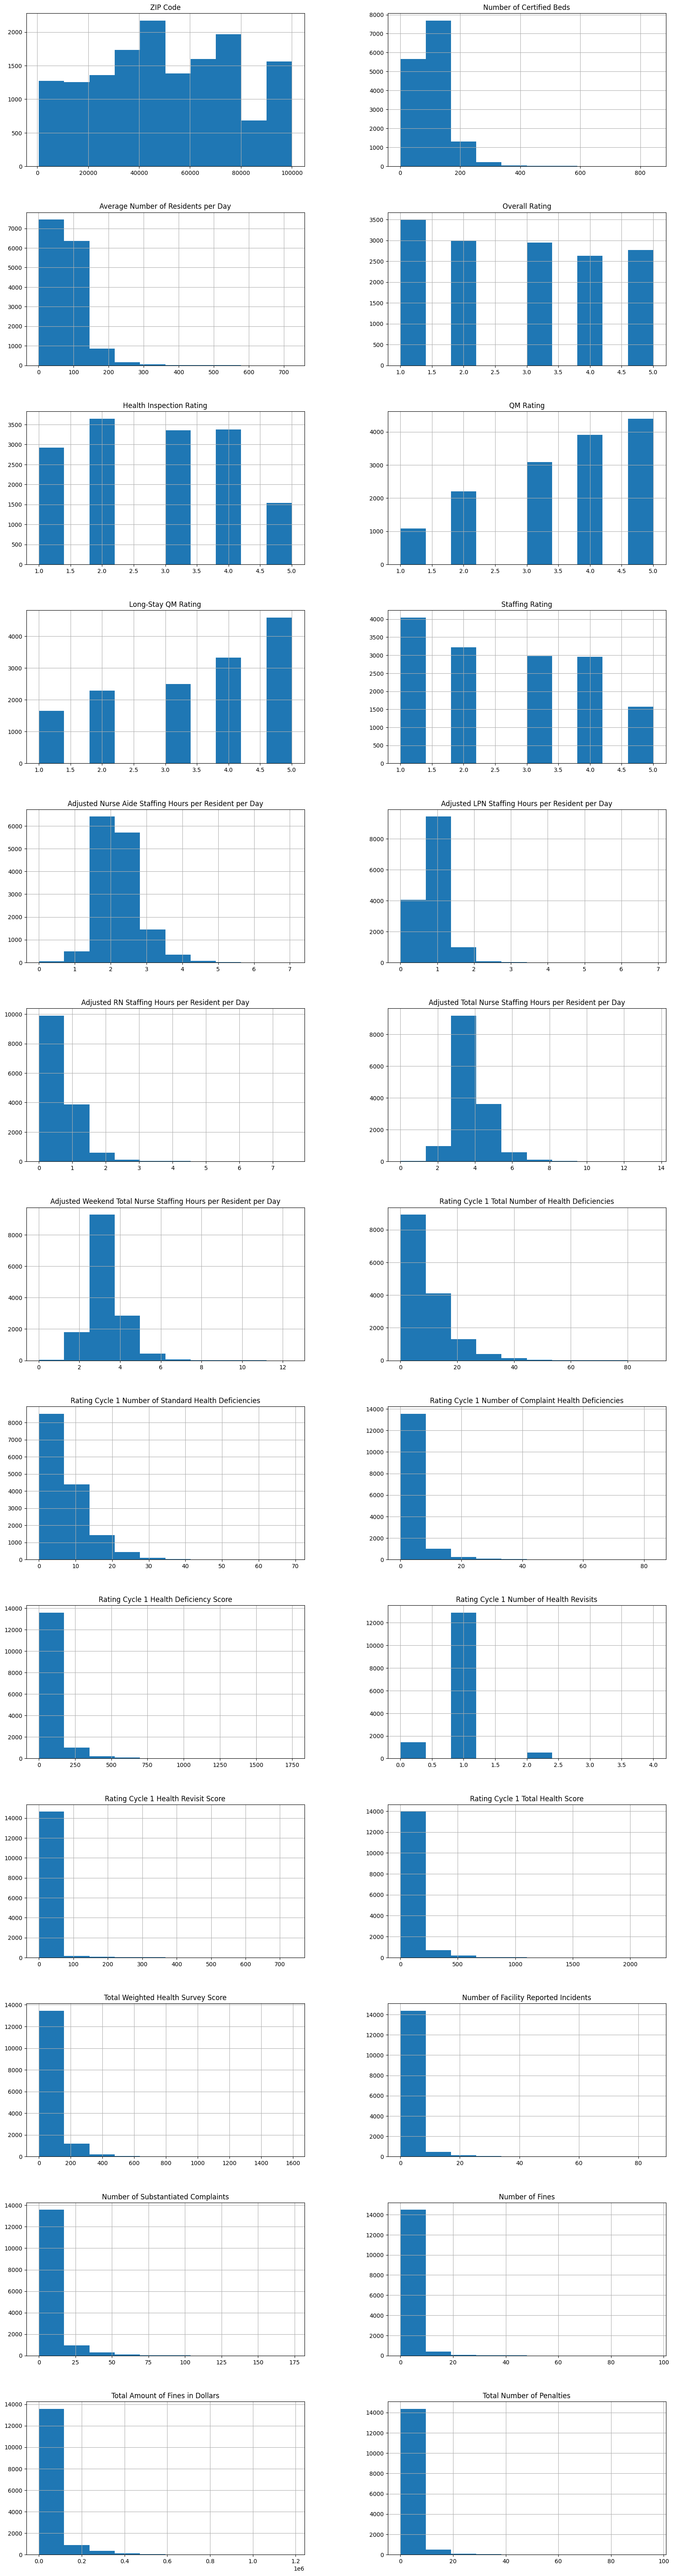

In [68]:
provider_dropnull.hist(figsize = (20, 80), layout = (-1,2))

In [69]:
provider_final = provider_dropnull.copy()

## Merge Datasets

In [70]:
# Pivot mds table to one row per measure

mds_pivoted = mds_final.pivot(index='CMS Certification Number (CCN)', columns='Measure Description', values='Four Quarter Average Score')

In [71]:
merged_1 = pd.merge(provider_final, survey_final, on = 'CMS Certification Number (CCN)')
merged_2 = pd.merge(merged_1, mds_pivoted, on = 'CMS Certification Number (CCN)')

In [72]:
merged_final = pd.merge(merged_2, claims_final, on = 'CMS Certification Number (CCN)')

In [73]:
# Check Merged Data Set Shape
merged_final.shape

(12111, 65)

The number of rows has decreased as each claims final did not have an outcome for all nursing homes (as some where short stay only).

In [74]:
# Check columns in table
merged_final.columns

Index(['CMS Certification Number (CCN)', 'Provider Name', 'Provider Address',
       'City/Town', 'State', 'ZIP Code', 'Ownership Type',
       'Number of Certified Beds', 'Average Number of Residents per Day',
       'Provider Type', 'Provider Resides in Hospital',
       'Continuing Care Retirement Community', 'Abuse Icon',
       'Most Recent Health Inspection More Than 2 Years Ago',
       'Provider Changed Ownership in Last 12 Months', 'Overall Rating',
       'Health Inspection Rating', 'QM Rating', 'Long-Stay QM Rating',
       'Staffing Rating',
       'Adjusted Nurse Aide Staffing Hours per Resident per Day',
       'Adjusted LPN Staffing Hours per Resident per Day',
       'Adjusted RN Staffing Hours per Resident per Day',
       'Adjusted Total Nurse Staffing Hours per Resident per Day',
       'Adjusted Weekend Total Nurse Staffing Hours per Resident per Day',
       'Rating Cycle 1 Standard Survey Health Date',
       'Rating Cycle 1 Total Number of Health Deficiencies',
 

In [75]:
# Show descriptive stats for numerical data
merged_final.describe().T

count          mean  \
ZIP Code                                            12111.0  48986.874164   
Number of Certified Beds                            12111.0    114.349765   
Average Number of Residents per Day                 12090.0     87.444814   
Overall Rating                                      12024.0      2.809880   
Health Inspection Rating                            12024.0      2.742016   
QM Rating                                           11928.0      3.505533   
Long-Stay QM Rating                                 11927.0      3.438920   
Staffing Rating                                     11990.0      2.609341   
Adjusted Nurse Aide Staffing Hours per Resident...  11859.0      2.217805   
Adjusted LPN Staffing Hours per Resident per Day    11859.0      0.877320   
Adjusted RN Staffing Hours per Resident per Day     11859.0      0.645537   
Adjusted Total Nurse Staffing Hours per Residen...  11859.0      3.712146   
Adjusted Weekend Total Nurse Staffing Hours per...  11859.0      3.235382   
Rating Cycle 1 Total Number of Health Deficiencies  12096.0      9.163029   
Rating Cycle 1 Number of Standard Health Defici...  12096.0      7.236690   
Rating Cycle 1 Number of Complaint Health Defic...  12096.0      2.881035   
Rating Cycle 1 Health Deficiency Score              12096.0     73.257854   
Rating Cycle 1 Number of Health Revisits            12096.0      0.953208   
Rating Cycle 1 Health Revisit Score                 12096.0      4.720403   
Rating Cycle 1 Total Health Score                   12096.0     77.978257   
Total Weighted Health Survey Score                  12096.0     73.975541   
Number of Facility Reported Incidents               12111.0      1.733548   
Number of Substantiated Complaints                  12111.0      6.236892   
Number of Fines                                     12111.0      2.343242   
Total Amount of Fines in Dollars                    12111.0  39345.748508   
Total Number of Penalties                           12111.0      2.551482   
Total Number of Health Deficiencies                 12111.0      7.273718   
Count of Freedom from Abuse and Neglect and Exp...  12111.0      0.298159   
Count of Quality of Life and Care Deficiencies      12111.0      1.886715   
Count of Resident Assessment and Care Planning ...  12111.0      1.130460   
Count of Nursing and Physician Services Deficie...  12111.0      0.255883   
Count of Resident Rights Deficiencies               12111.0      1.104698   
Count of Nutrition and Dietary Deficiencies         12111.0      0.764264   
Count of Pharmacy Service Deficiencies              12111.0      0.858889   
Count of Environmental Deficiencies                 12111.0      0.200974   
Count of Administration Deficiencies                12111.0      0.206341   
Count of Infection Control Deficiencies             12111.0      0.567335   
Percentage of high risk long-stay residents wit...  12085.0      8.025866   
Percentage of long-stay residents assessed and ...  12105.0     91.831966   
Percentage of long-stay residents assessed and ...  12110.0     94.963747   
Percentage of long-stay residents experiencing ...  12105.0      3.453727   
Percentage of long-stay residents who have depr...  12104.0      8.256045   
Percentage of long-stay residents who lose too ...  12098.0      6.131817   
Percentage of long-stay residents who received ...  12103.0     19.512159   
Percentage of long-stay residents who received ...  11930.0     14.721965   
Percentage of long-stay residents who were phys...  12103.0      0.121972   
Percentage of long-stay residents whose ability...  12073.0     15.194703   
Percentage of long-stay residents whose need fo...  12094.0     14.782054   
Percentage of long-stay residents with a cathet...  12103.0      1.530684   
Percentage of long-stay residents with a urinar...  12104.0      2.272693   
Percentage of low risk long-stay residents who ...  11955.0     47.792533   
Adjusted Hospitalization Rate                     

# Feature Engineering

Engineer features that may be realted to target.

In [76]:
pre_engineered = merged_final.copy()

In [77]:
merged_final['Average Occupancy'] = merged_final['Average Number of Residents per Day'] / merged_final['Number of Certified Beds']
merged_final['Percent Nursing Hours Filled by RN'] = merged_final['Adjusted RN Staffing Hours per Resident per Day'] / merged_final['Adjusted Total Nurse Staffing Hours per Resident per Day']
merged_final['Ratio of Weekend Nursing Hours to Average Daily Hours'] = merged_final['Adjusted Total Nurse Staffing Hours per Resident per Day'] / merged_final['Adjusted Weekend Total Nurse Staffing Hours per Resident per Day']
merged_final['LPN to RN Ratio'] = merged_final['Adjusted LPN Staffing Hours per Resident per Day'] / merged_final['Adjusted RN Staffing Hours per Resident per Day']
merged_final['Percent Nursing Hours Filled by LPN'] = merged_final['Adjusted LPN Staffing Hours per Resident per Day'] / merged_final['Adjusted Total Nurse Staffing Hours per Resident per Day']
merged_final['Percent Nursing Hours Filled by Nursing Aide'] = merged_final['Adjusted Nurse Aide Staffing Hours per Resident per Day'] / merged_final['Adjusted Total Nurse Staffing Hours per Resident per Day']


In [78]:
merged_final.iloc[:,-7:].describe().T

C:\Users\milne\My Drive (johnathan.milner@eastern.edu)\Milner DTSC 691 Project\Project Completion\venv\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count      mean  \
Adjusted Hospitalization Rate                       12111.0  1.554169   
Average Occupancy                                   12090.0  0.782329   
Percent Nursing Hours Filled by RN                  11859.0  0.170013   
Ratio of Weekend Nursing Hours to Average Daily...  11859.0  1.152496   
LPN to RN Ratio                                     11859.0       inf   
Percent Nursing Hours Filled by LPN                 11859.0  0.239423   
Percent Nursing Hours Filled by Nursing Aide        11859.0  0.597239   

                                                         std       min  \
Adjusted Hospitalization Rate                       0.544113  0.669960   
Average Occupancy                                   0.980121  0.025000   
Percent Nursing Hours Filled by RN                  0.082850  0.000000   
Ratio of Weekend Nursing Hours to Average Daily...  0.091830  0.465105   
LPN to RN Ratio                                          NaN  0.000000   
Percent Nursing Hours Filled by LPN                 0.079025  0.000000   
Percent Nursing Hours Filled by Nursing Aide        0.065119  0.000000   

                                                         25%       50%  \
Adjusted Hospitalization Rate                       1.243850  1.455969   
Average Occupancy                                   0.669110  0.801876   
Percent Nursing Hours Filled by RN                  0.110120  0.156487   
Ratio of Weekend Nursing Hours to Average Daily...  1.105378  1.143233   
LPN to RN Ratio                                     0.921372  1.577538   
Percent Nursing Hours Filled by LPN                 0.188330  0.243947   
Percent Nursing Hours Filled by Nursing Aide        0.556478  0.596052   

                                                         75%         max  
Adjusted Hospitalization Rate                       1.733384   27.328443  
Average Occupancy                                   0.902273  106.800000  
Percent Nursing Hours Filled by RN                  0.214658    0.987616  
Ratio of Weekend Nursing Hours to Average Daily...  1.189142    6.697901  
LPN to RN Ratio                                     2.522810         inf  
Percent Nursing Hours Filled by LPN                 0.292178    0.870628  
Percent Nursing Hours Filled by Nursing Aide        0.637362    0.965078

LPN to RN Ratio has some `inf` values caused by a 0 denominator. We will see what the highest value is that is not `inf`

In [79]:
merged_final[merged_final['LPN to RN Ratio'] != np.inf]['LPN to RN Ratio'].max()

95.80533596837944

As this is close to 100, we will replace the `inf` values with 100.

In [80]:
merged_final.loc[merged_final['LPN to RN Ratio'] == np.inf, 'LPN to RN Ratio'] = 100

Most have an LPN / RN ratio less than 10. Will set all values greater than 10 to ten.

In [81]:
merged_final.loc[merged_final['LPN to RN Ratio'] > 10, 'LPN to RN Ratio'] = 10

<Axes: >

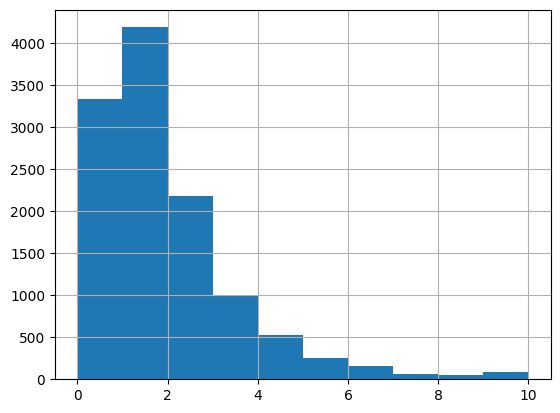

In [82]:
merged_final['LPN to RN Ratio'].hist()

In addition there are a few values where the average occupancy is significantly over 100%.

In [83]:
merged_final.loc[merged_final['Average Occupancy'] > 1.05, 'Average Occupancy'].sort_values(ascending = False)

2067     106.800000
11259      6.516667
10095      2.980000
2057       2.768000
9480       2.468182
            ...    
9619       1.058140
9942       1.057627
800        1.054545
724        1.054054
7868       1.052113
Name: Average Occupancy, Length: 94, dtype: float64

As it is theoretically possible that a nursing home may be over capacity, but not to the extent of 100 times their capacity we will replace all values greater than 1.05 with 1.05

In [84]:
merged_final.loc[merged_final['Average Occupancy'] > 1.05, 'Average Occupancy'] = 1.05

<Axes: >

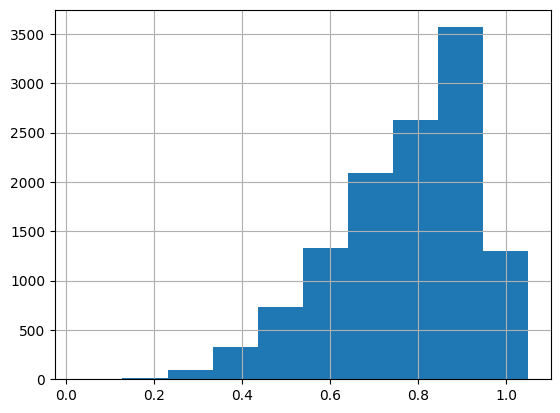

In [85]:
merged_final['Average Occupancy'].hist()

In [86]:
merged_final.loc[merged_final['Ratio of Weekend Nursing Hours to Average Daily Hours'] > 2, 'Ratio of Weekend Nursing Hours to Average Daily Hours'] = 2

In [87]:
merged_final.iloc[:,-7:].describe().T

count      mean  \
Adjusted Hospitalization Rate                       12111.0  1.554169   
Average Occupancy                                   12090.0  0.771495   
Percent Nursing Hours Filled by RN                  11859.0  0.170013   
Ratio of Weekend Nursing Hours to Average Daily...  11859.0  1.151910   
LPN to RN Ratio                                     11859.0  1.984969   
Percent Nursing Hours Filled by LPN                 11859.0  0.239423   
Percent Nursing Hours Filled by Nursing Aide        11859.0  0.597239   

                                                         std       min  \
Adjusted Hospitalization Rate                       0.544113  0.669960   
Average Occupancy                                   0.160748  0.025000   
Percent Nursing Hours Filled by RN                  0.082850  0.000000   
Ratio of Weekend Nursing Hours to Average Daily...  0.073857  0.465105   
LPN to RN Ratio                                     1.589630  0.000000   
Percent Nursing Hours Filled by LPN                 0.079025  0.000000   
Percent Nursing Hours Filled by Nursing Aide        0.065119  0.000000   

                                                         25%       50%  \
Adjusted Hospitalization Rate                       1.243850  1.455969   
Average Occupancy                                   0.669110  0.801876   
Percent Nursing Hours Filled by RN                  0.110120  0.156487   
Ratio of Weekend Nursing Hours to Average Daily...  1.105378  1.143233   
LPN to RN Ratio                                     0.921372  1.577538   
Percent Nursing Hours Filled by LPN                 0.188330  0.243947   
Percent Nursing Hours Filled by Nursing Aide        0.556478  0.596052   

                                                         75%        max  
Adjusted Hospitalization Rate                       1.733384  27.328443  
Average Occupancy                                   0.902273   1.050000  
Percent Nursing Hours Filled by RN                  0.214658   0.987616  
Ratio of Weekend Nursing Hours to Average Daily...  1.189142   2.000000  
LPN to RN Ratio                                     2.522810  10.000000  
Percent Nursing Hours Filled by LPN                 0.292178   0.870628  
Percent Nursing Hours Filled by Nursing Aide        0.637362   0.965078

While not feature engineering, the feature 'Percentage of long-stay residents who were physically restrained' has several outliers above 10% that may negatively impact model performance.

merged_final['Percentage of long-stay residents who were physically restrained'].sort_values(ascending = False).head(30)

In [88]:
merged_final.loc[merged_final['Percentage of long-stay residents who were physically restrained'] > 10, 'Percentage of long-stay residents who were physically restrained'] = 10

Create Function that condenses the above feature Engineering in a repeatable form:

In [89]:
def add_features(df):
    '''
    Adds additional features to the Data Frame
    In addition cleans outliers from 'Percentage of long-stay residents who were physically restrained' feature
    '''
    df['Average Occupancy'] = df['Average Number of Residents per Day'] / df['Number of Certified Beds']
    df['Percent Nursing Hours Filled by RN'] = df['Adjusted RN Staffing Hours per Resident per Day'] / df['Adjusted Total Nurse Staffing Hours per Resident per Day']
    df['Ratio of Weekend Nursing Hours to Average Daily Hours'] = df['Adjusted Total Nurse Staffing Hours per Resident per Day'] / df['Adjusted Weekend Total Nurse Staffing Hours per Resident per Day']
    df['LPN to RN Ratio'] = df['Adjusted LPN Staffing Hours per Resident per Day'] / df['Adjusted RN Staffing Hours per Resident per Day']
    df['Percent Nursing Hours Filled by LPN'] = df['Adjusted LPN Staffing Hours per Resident per Day'] / df['Adjusted Total Nurse Staffing Hours per Resident per Day']
    df['Percent Nursing Hours Filled by Nursing Aide'] = df['Adjusted Nurse Aide Staffing Hours per Resident per Day'] / df['Adjusted Total Nurse Staffing Hours per Resident per Day']
    # Clean outliers
    df.loc[df['LPN to RN Ratio'] == np.inf, 'LPN to RN Ratio'] = 10 # Sets value to 10 where denominator is 0
    df.loc[df['LPN to RN Ratio'] > 10, 'LPN to RN Ratio'] = 10 # Sets max value to 10
    df.loc[df['Average Occupancy'] > 1.05, 'Average Occupancy'] = 1.05 # Sets max occupancy to 1.05
    df.loc[df['Ratio of Weekend Nursing Hours to Average Daily Hours'] > 2, 'Ratio of Weekend Nursing Hours to Average Daily Hours'] = 2
    df.loc[df['Percentage of long-stay residents who were physically restrained'] > 10, 'Percentage of long-stay residents who were physically restrained'] = 10
    return df
    
merged_final = add_features(pre_engineered)

## Investigate Correlations

In [90]:
# Show correlation Matrix of all Numerical Features
corr_matrix = merged_final.select_dtypes('number').corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

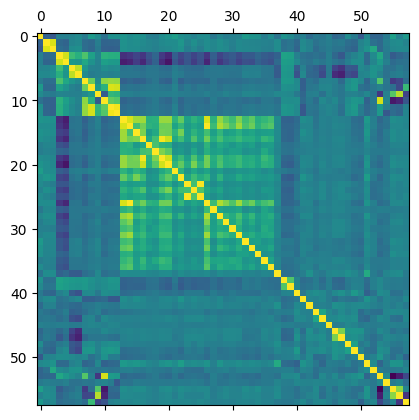

In [91]:
# The above correlation matrix shown in a smaller format

plt.matshow(merged_final.select_dtypes('number').corr())

As there is a lot of numerical features this is hard to interpret. However the majority of the matrix is blue indicating low correlation. However there are several features  that are highly correlated.

Next we will look at the correlation to our target feature.

In [92]:
corr_matrix["Adjusted Hospitalization Rate"].sort_values(ascending=False)

Adjusted Hospitalization Rate                                                                        1.000000
Percentage of high risk long-stay residents with pressure ulcers                                     0.317982
Number of Substantiated Complaints                                                                   0.224324
Rating Cycle 1 Total Number of Health Deficiencies                                                   0.199947
Rating Cycle 1 Number of Complaint Health Deficiencies                                               0.173535
Total Weighted Health Survey Score                                                                   0.162339
Count of Quality of Life and Care Deficiencies                                                       0.156379
LPN to RN Ratio                                                                                      0.155691
Average Number of Residents per Day                                                                  0.152620
Rating Cyc

The features at the top and bottom of the list above are the most correlated to Adjusted Hospitalization Rate.  

Next we will look at collinearity between other features in the data set. We will create a simple table that shows the pairs of features with a correlation coefficient greater than 0.8.

In [93]:
def high_corr(df, thresh = 0.8):
    '''
    Returns a list of correlated features above a certain thresh value
    '''
    corr_matrix = corr_matrix = df.select_dtypes('number').corr() # Creates correlation Matrix with numeric values
    corr_list = corr_matrix.melt(ignore_index=False).reset_index() # Pivots correlation longer
    corr_list = corr_list[(corr_list['index']) != (corr_list['variable'])].sort_values(
        'value') # Filters out the identity line where both features are the same and sorts
    corr_list = corr_list[abs(corr_list['value']) > thresh].sort_values(
        'value', ascending = False) # Filter for absolute correlations greater than thesh value
    corr_list = corr_list.reset_index(drop = True)
    return corr_list.iloc[corr_list.index % 2 == 0].reset_index(
        drop = True).rename(columns = {'index' : 'Feature A',
                                        'variable' : 'Feature B',
                                        'value' : 'Correlation'})
                        # Returns every other row as each combination has two rows (e.g. A vs B and B vs A)
                        # Reanmes columns to make sense
high_corr(merged_final)

Feature A  \
0   Rating Cycle 1 Number of Standard Health Defic...   
1                           Total Number of Penalties   
2                   Rating Cycle 1 Total Health Score   
3   Adjusted Weekend Total Nurse Staffing Hours pe...   
4                            Number of Certified Beds   
5   Adjusted Nurse Aide Staffing Hours per Residen...   
6   Rating Cycle 1 Total Number of Health Deficien...   
7   Rating Cycle 1 Total Number of Health Deficien...   
8                  Percent Nursing Hours Filled by RN   
9   Adjusted Nurse Aide Staffing Hours per Residen...   
10                 Total Weighted Health Survey Score   
11                           Health Inspection Rating   
12                 Total Weighted Health Survey Score   
13                                          QM Rating   
14   Adjusted LPN Staffing Hours per Resident per Day   

                                            Feature B  Correlation  
0                 Total Number of Health Deficiencies     0.997249  
1                                     Number of Fines     0.991146  
2              Rating Cycle 1 Health Deficiency Score     0.973241  
3   Adjusted Total Nurse Staffing Hours per Reside...     0.963093  
4                 Average Number of Residents per Day     0.899534  
5   Adjusted Total Nurse Staffing Hours per Reside...     0.898223  
6   Rating Cycle 1 Number of Standard Health Defic...     0.894377  
7                 Total Number of Health Deficiencies     0.892095  
8     Adjusted RN Staffing Hours per Resident per Day     0.890512  
9   Adjusted Weekend Total Nurse Staffing Hours pe...     0.880403  
10                  Rating Cycle 1 Total Health Score     0.876359  
11                                     Overall Rating     0.875065  
12             Rating Cycle 1 Health Deficiency Score     0.859948  
13                                Long-Stay QM Rating     0.825163  
14                Percent Nursing Hours Filled by LPN     0.802390

Looking at the highly correlated features (defines as r > 0.8) it is clear they are all pairs of features reporting very similar information with slightly different definitions.  

To avoid colinearity in the model and help with model explainability I will remove features. I decided to remove the features from each pair that had the lowest absolute correlation.  

This Results in Removing the Following Features:  

- Total Number of Health Deficiencies  
- Number of Fines  
- Rating Cycle 1 Total Health Score  
- Adjusted Weekend Total Nurse Staffing Hours per Resident per Day  
- Number of Certified Beds   
- Adjusted Nurse Aide Staffing Hours per Resident per Day  
- Rating Cycle 1 Number of Standard Health Deficiencies  
- Total Number of Health Deficiencies  
- Overall Rating  
- Rating Cycle 1 Health Deficiency Score  
- QM Rating
- Adjusted LPN Staffing Hours per Resident per Day

The following engineered features have high collinearity with an existing feature and have a lower correlation with the target so they are dropped:

- Percent Nursing Hours Filled by RN


In [94]:
# Drop collinear Columns

merged_dropco = merged_final.drop(columns = ['Total Number of Health Deficiencies',
    'Number of Fines',
    'Rating Cycle 1 Total Health Score',
    'Adjusted Weekend Total Nurse Staffing Hours per Resident per Day',
    'Number of Certified Beds',
    'Adjusted Nurse Aide Staffing Hours per Resident per Day',
    'Rating Cycle 1 Number of Standard Health Deficiencies',
    'Total Number of Health Deficiencies',
    'Overall Rating',
    'Rating Cycle 1 Health Deficiency Score',
    'QM Rating',
    'Adjusted LPN Staffing Hours per Resident per Day',
    'Percent Nursing Hours Filled by RN'])

In [95]:
# Verifying there are no more high correlations
high_corr(merged_dropco)

Empty DataFrame
Columns: [Feature A, Feature B, Correlation]
Index: []

## Create Scatter Plots to Identify Patterns

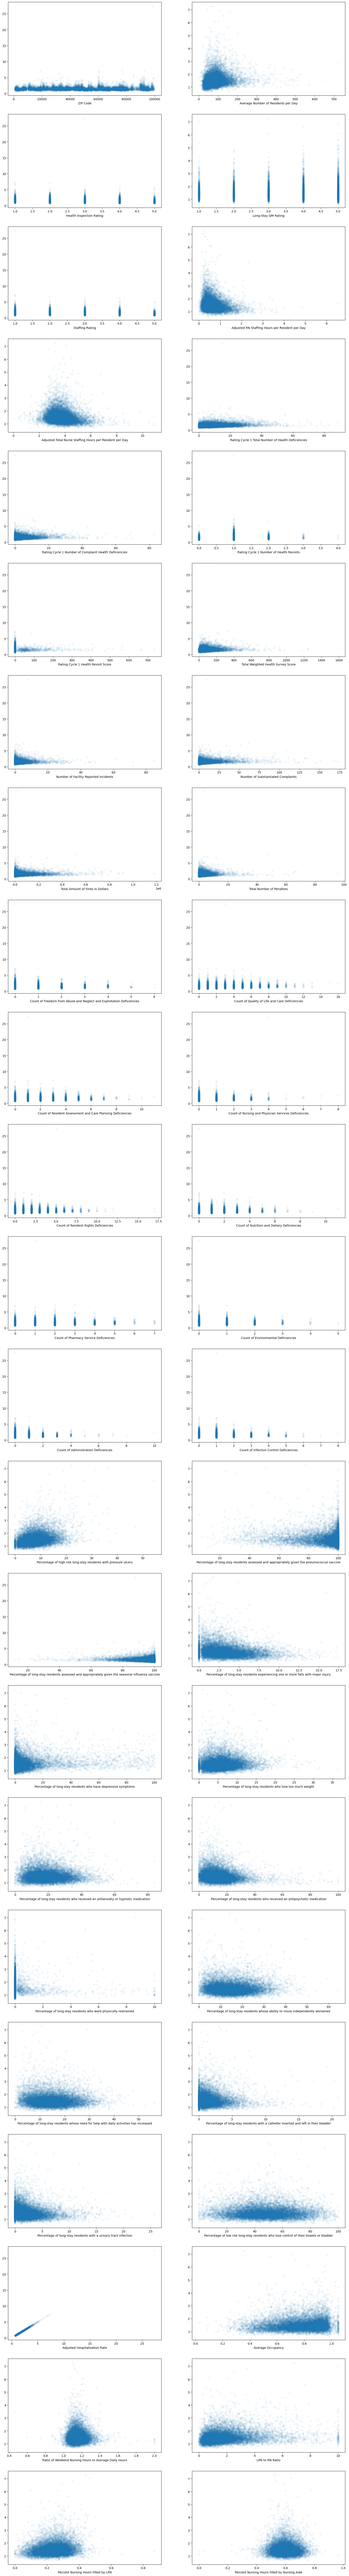

In [96]:
plt.figure(figsize = (20, 200))
num = 1
for column in merged_dropco.select_dtypes('number').columns:
    plt.subplot(30,2, num)
    plt.scatter(merged_dropco[column], merged_dropco['Adjusted Hospitalization Rate'], alpha = .05)
    plt.xlabel(column)
    num += 1

In [97]:
merged_dropco.dtypes[merged_dropco.dtypes == 'object']

CMS Certification Number (CCN)                         object
Provider Name                                          object
Provider Address                                       object
City/Town                                              object
State                                                  object
Ownership Type                                         object
Provider Type                                          object
Provider Resides in Hospital                           object
Continuing Care Retirement Community                   object
Abuse Icon                                             object
Most Recent Health Inspection More Than 2 Years Ago    object
Provider Changed Ownership in Last 12 Months           object
Rating Cycle 1 Standard Survey Health Date             object
dtype: object

<Axes: title={'center': 'Adjusted Hospitalization Rate'}, xlabel='Adjusted Hospitalization Rate', ylabel='State'>

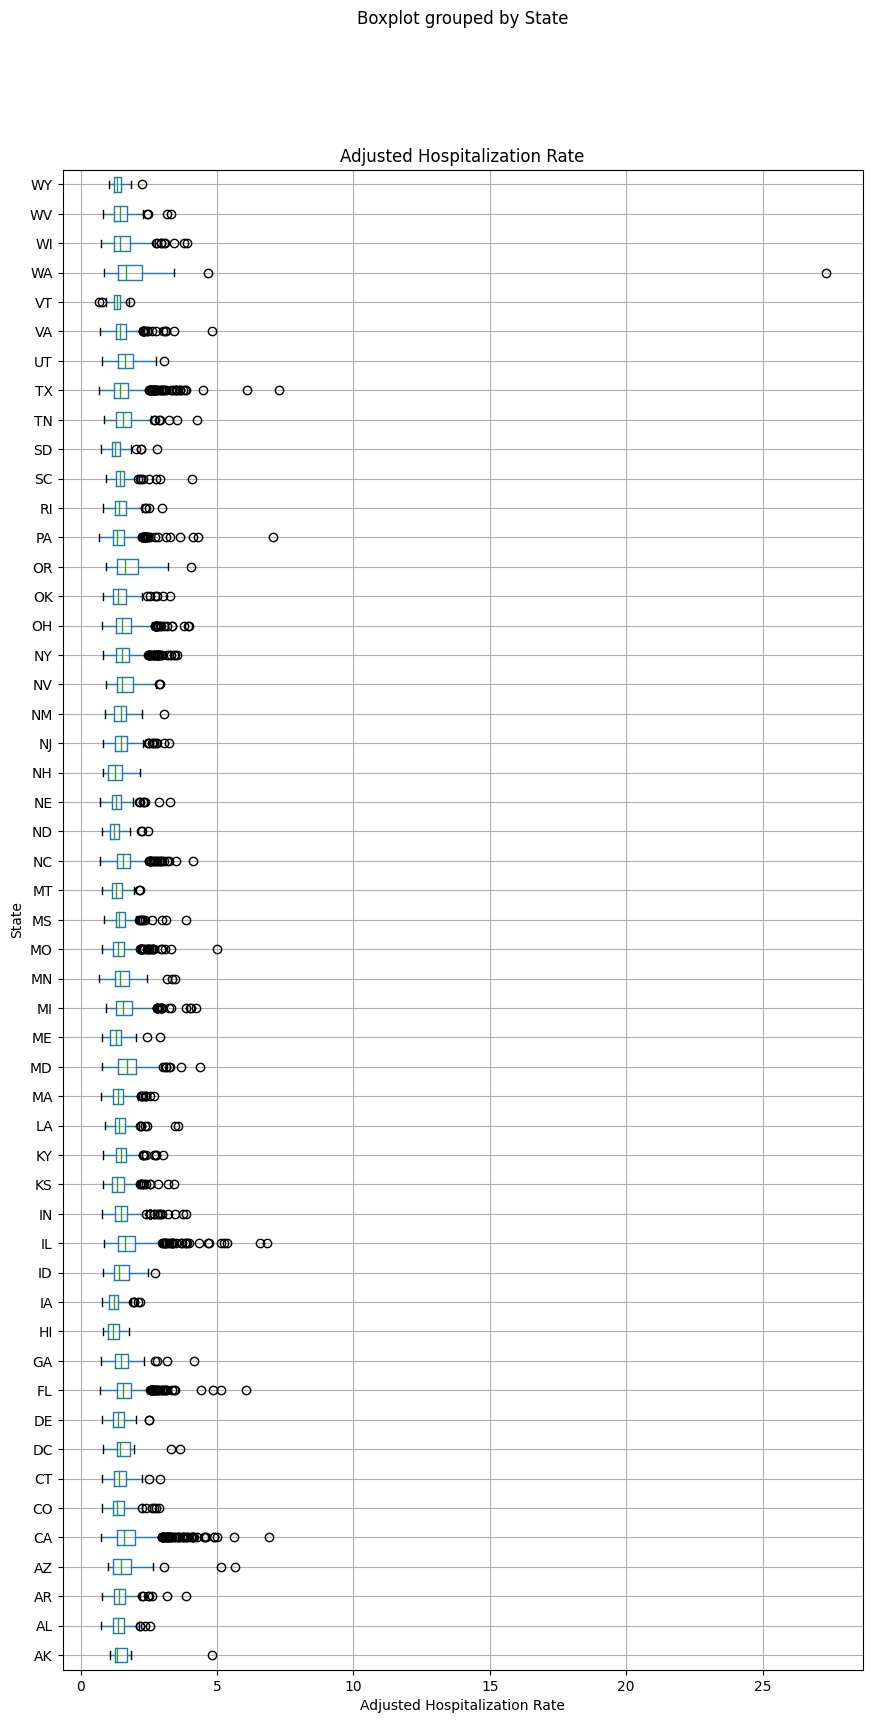

In [98]:
merged_dropco.boxplot(column = 'Adjusted Hospitalization Rate', 
             by = 'State',
             vert = False, 
             figsize = (10, 20), 
             ylabel = 'State',
             xlabel = 'Adjusted Hospitalization Rate')

<Axes: title={'center': 'Adjusted Hospitalization Rate'}, ylabel='Ownership Type'>

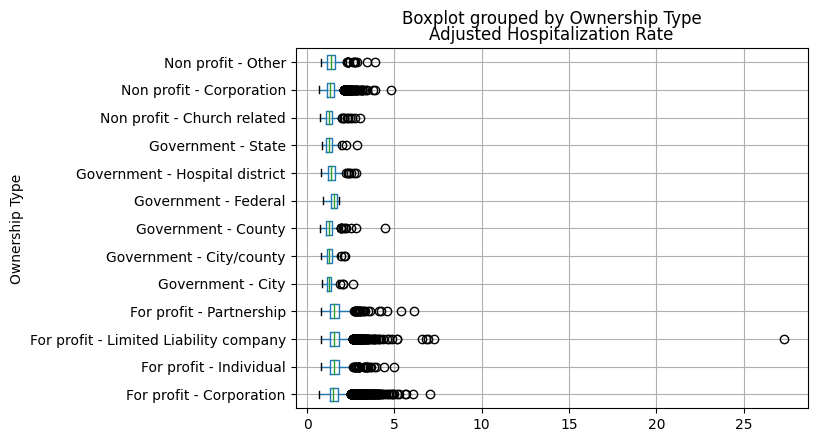

In [99]:
merged_dropco.boxplot(column = 'Adjusted Hospitalization Rate', by = 'Ownership Type',
            vert = False)

<Axes: title={'center': 'Adjusted Hospitalization Rate'}, xlabel='Provider Type'>

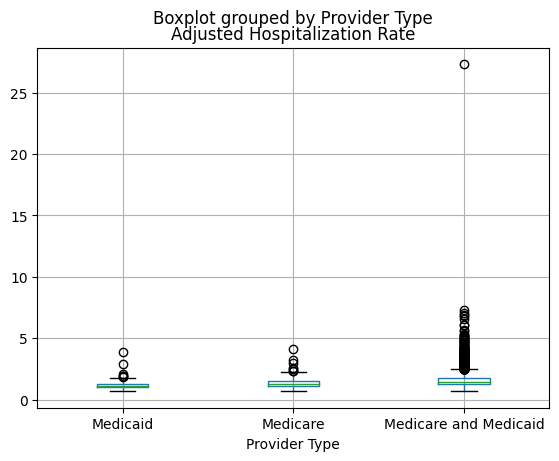

In [100]:
merged_dropco.boxplot(column = 'Adjusted Hospitalization Rate', by = 'Provider Type')

<Axes: title={'center': 'Adjusted Hospitalization Rate'}, xlabel='Provider Resides in Hospital'>

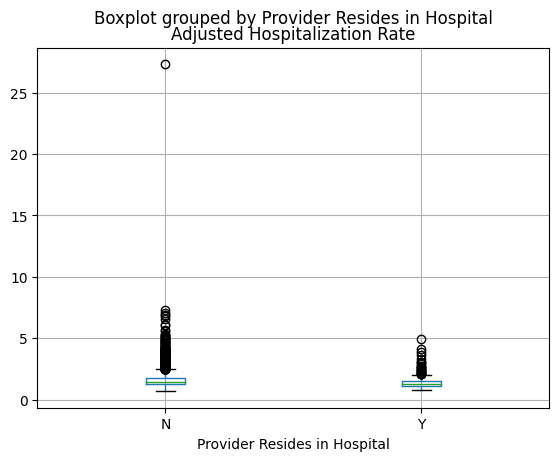

In [101]:
merged_dropco.boxplot(column = 'Adjusted Hospitalization Rate', by = 'Provider Resides in Hospital')

<Axes: title={'center': 'Adjusted Hospitalization Rate'}, xlabel='Continuing Care Retirement Community'>

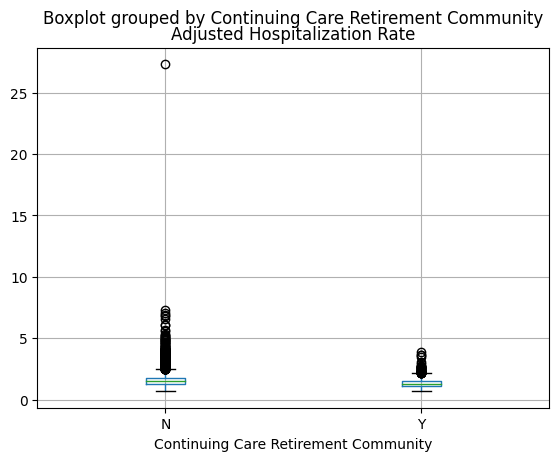

In [102]:
merged_dropco.boxplot(column = 'Adjusted Hospitalization Rate', by = 'Continuing Care Retirement Community')

<Axes: title={'center': 'Adjusted Hospitalization Rate'}, xlabel='Abuse Icon'>

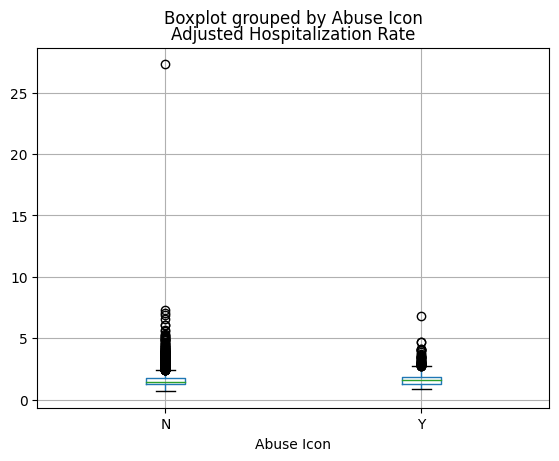

In [103]:
merged_dropco.boxplot(column = 'Adjusted Hospitalization Rate', by = 'Abuse Icon')

<Axes: title={'center': 'Adjusted Hospitalization Rate'}, xlabel='Most Recent Health Inspection More Than 2 Years Ago'>

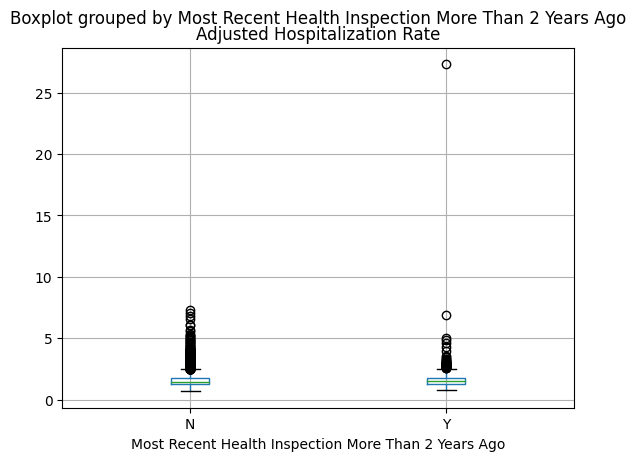

In [104]:
merged_dropco.boxplot(column = 'Adjusted Hospitalization Rate', by = 'Most Recent Health Inspection More Than 2 Years Ago')

<Axes: title={'center': 'Adjusted Hospitalization Rate'}, xlabel='Provider Changed Ownership in Last 12 Months'>

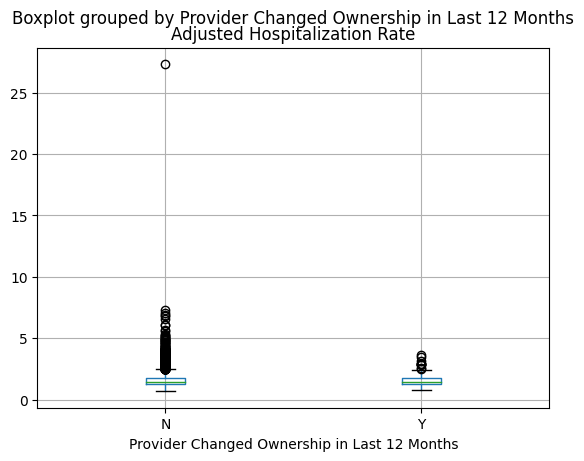

In [105]:
merged_dropco.boxplot(column = 'Adjusted Hospitalization Rate', by = 'Provider Changed Ownership in Last 12 Months')

I will now split ownership type into two columns

In [106]:
def ownersplit(df):
    df = df.copy()
    df[['Ownership Type', 'Ownership Sub-Type']] = df['Ownership Type'].str.split(
    ' - ', expand = True)
    return df

splitowner_df = ownersplit(merged_dropco)

<Axes: title={'center': 'Adjusted Hospitalization Rate'}, xlabel='Ownership Type'>

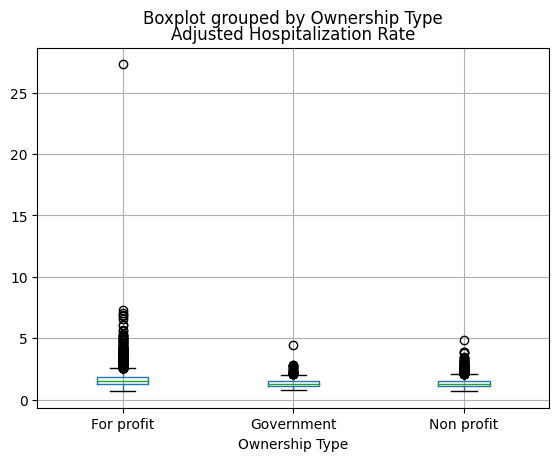

In [107]:
splitowner_df.boxplot(column = 'Adjusted Hospitalization Rate', by = 'Ownership Type')

## Clean Missing Values:

In [108]:
# Check Frequency of Missing Values

def null_counts(df):
    '''
    Returns listing of columns containing nulls sorted by number of nulls
    '''
    output = df.isna().sum().sort_values(ascending = False)
    return output[output > 0]

null_counts(splitowner_df)

Adjusted RN Staffing Hours per Resident per Day                                                      252
Adjusted Total Nurse Staffing Hours per Resident per Day                                             252
Percent Nursing Hours Filled by Nursing Aide                                                         252
Percent Nursing Hours Filled by LPN                                                                  252
LPN to RN Ratio                                                                                      252
Ratio of Weekend Nursing Hours to Average Daily Hours                                                252
Long-Stay QM Rating                                                                                  184
Percentage of long-stay residents who received an antipsychotic medication                           181
Percentage of low risk long-stay residents who lose control of their bowels or bladder               156
Staffing Rating                                        

The most commonly null features are three features regarding nurse staffing hours.  

If more than three features are missing, we will remove that row from the data. If less than three featues are missing, we will later use an imputer to fill in remaining missing values.

In [109]:
len(splitowner_df.columns) - 3

57

In [110]:
def drop_rows(df, missing_values = 3):
    '''
    Drops rows with greater than a specified threshold of missing values
    '''
    original_length = len(df)
    df = df.dropna(thresh = len(df.columns) - missing_values)
    new_length = len(df)
    rows_dropped = original_length - new_length
    print(f'{rows_dropped} rows dropped that had at least {missing_values} missing values.')
    return df

null_drop_df = drop_rows(splitowner_df)

258 rows dropped that had at least 3 missing values.


In [111]:
null_counts(null_drop_df)

Percentage of long-stay residents who received an antipsychotic medication                   168
Long-Stay QM Rating                                                                          156
Percentage of low risk long-stay residents who lose control of their bowels or bladder       137
Staffing Rating                                                                               67
Health Inspection Rating                                                                      67
Percentage of long-stay residents whose ability to move independently worsened                30
Percentage of high risk long-stay residents with pressure ulcers                              18
Percentage of long-stay residents whose need for help with daily activities has increased     10
Percentage of long-stay residents who lose too much weight                                     5
Percentage of long-stay residents who were physically restrained                               2
Percentage of long-stay reside

In [112]:
# Set index to CCN Number
data_merge_complete = null_drop_df.set_index('CMS Certification Number (CCN)', drop = True)
data_merge_complete

Provider Name  \
CMS Certification Number (CCN)                                                
015009                                             BURNS NURSING HOME, INC.   
015010                                       COOSA VALLEY HEALTHCARE CENTER   
015012                                           HIGHLANDS HEALTH AND REHAB   
015014                          EASTVIEW REHABILITATION & HEALTHCARE CENTER   
015015                                        PLANTATION MANOR NURSING HOME   
...                                                                     ...   
745000                                               LAS ALTURAS DE PENITAS   
745001                                              ESTATES AT SHAVANO PARK   
745002                                             KENT COUNTY NURSING HOME   
745004                                         THE BRIXTON AT HORSESHOE BAY   
745006                               FIVE POINTS NURSING AND REHABILITATION   

                                           Provider Address      City/Town  \
CMS Certification Number (CCN)                                               
015009                                 701 MONROE STREET NW   RUSSELLVILLE   
015010                               260 WEST WALNUT STREET      SYLACAUGA   
015012                                  380 WOODS COVE ROAD     SCOTTSBORO   
015014                             7755 FOURTH AVENUE SOUTH     BIRMINGHAM   
015015                          6450 OLD TUSCALOOSA HIGHWAY       MC CALLA   
...                                                     ...            ...   
745000                                    414 LIBERTY BLVD.        PENITAS   
745001                                  4366 LOCKHILL SELMA   SHAVANO PARK   
745002                                      1443 NORTH MAIN         JAYTON   
745004                                   15101 WEST FM 2147  HORSESHOE BAY   
745006                                  1901 N. HAMPTON RD.         DESOTO   

                               State  ZIP Code Ownership Type  \
CMS Certification Number (CCN)                                  
015009                            AL     35653     For profit   
015010                            AL     35150     For profit   
015012                            AL     35768     Government   
015014                            AL     35206     For profit   
015015                            AL     35111     For profit   
...                              ...       ...            ...   
745000                            TX     78576     For profit   
745001                            TX     78249     For profit   
745002                            TX     79528     Government   
745004                            TX     78657     For profit   
745006                            TX     75115     For profit   

                                Average Number of Residents per Day  \
CMS Certification Number (CCN)                                        
015009                                                         52.0   
015010                                                         77.1   
015012                                                         35.8   
015014                                                         70.1   
015015                                                         85.1   
...                                                             ...   
745000                                                         82.7   
745001                                                         59.8   
745002                                                         40.8   
745004                                                         46.8   
745006                                                         64.9   

                                        Provider Type  \
CMS Certification Number (CCN)                          
015009                          Medicare and Medicaid   
015010                          Medicare and Medicaid   
015012               